In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pip install -U pandas-profiling

In [3]:
# import pandas_profiling

In [5]:
!ls "/content/drive/MyDrive/Data Science/Proj2/Coronavirus"

owid-covid-data.csv


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Proj2/Coronavirus/owid-covid-data.csv')

In [8]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132639,ZWE,Africa,Zimbabwe,2021-11-07,133187.0,19.0,30.000,4685.0,0.0,1.000,8824.907,1.259,1.988,310.426,0.000,0.066,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1159.0,1393065.0,92.304,0.077,2879.0,0.191,0.01,96.0,tests performed,6021461.0,3372721.0,2648740.0,NaN,14436.0,15696.0,39.90,22.35,17.55,NaN,1040.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
132640,ZWE,Africa,Zimbabwe,2021-11-08,133205.0,18.0,28.286,4690.0,5.0,1.571,8826.099,1.193,1.874,310.757,0.331,0.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6034324.0,3380245.0,2654079.0,NaN,12863.0,15858.0,39.98,22.40,17.59,NaN,1051.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
132641,ZWE,Africa,Zimbabwe,2021-11-

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132644 entries, 0 to 132643
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   iso_code                                 132644 non-null  object 
 1   continent                                124170 non-null  object 
 2   location                                 132644 non-null  object 
 3   date                                     132644 non-null  object 
 4   total_cases                              125410 non-null  float64
 5   new_cases                                125408 non-null  float64
 6   new_cases_smoothed                       124365 non-null  float64
 7   total_deaths                             114293 non-null  float64
 8   new_deaths                               114489 non-null  float64
 9   new_deaths_smoothed                      124365 non-null  float64
 10  total_cases_per_million         

In [10]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.254100e+05,125408.000000,124365.000000,1.142930e+05,114489.000000,124365.000000,124766.000000,124764.000000,123726.000000,113662.000000,113858.000000,123726.00000,104426.000000,15947.000000,15947.000000,18692.00000,18692.000000,1340.000000,1340.000000,2126.000000,2126.000000,5.509000e+04,5.534500e+04,55345.000000,55090.000000,6.689300e+04,66893.000000,62869.000000,62209.000000,3.339100e+04,3.184300e+04,2.885400e+04,5.855000e+03,2.778700e+04,5.951000e+04,33391.000000,31843.000000,28854.000000,5855.000000,59510.000000,108057.000000,1.317040e+05,120074.000000,114425.000000,113159.000000,113800.000000,115174.000000,77021.000000,114669.000000,118421.000000,89329.000000,88037.000000,57713.000000,104208.000000,123313.000000,114771.000000,4656.000000,4656.000000,4656.000000,4656.000000
mean,2.038985e+06,8353.112888,8370.887531,5.045250e+04,184.004114,168.641989,19635.279048,86.276460,86.148382,402.810296,1.582210,1.44508,0.998744,892.907443,22.177688,4005.59710,155.118490,229.027494,16.394654,3081.191157,84.188633,5.698229e+04,1.190922e+07,508.594570,2.541481,5.301548e+04,2.422853,0.086493,160.198629,1.074031e+08,5.854553e+07,4.009685e+07,2.963610e+06,1.050348e+06,5.018732e+05,51.070572,29.541533,23.207197,2.768545,3415.224046,56.392337,1.575083e+08,399.292664,30.499315,8.744577,5.532147,19231.887272,13.507064,259.990910,8.039470,10.589701,32.748528,50.865182,3.029443,73.260475,0.726207,32052.628565,8.667889,15.883224,781.114218
std,1.163910e+07,43547.802492,43035.659063,2.589636e+05,871.591559,817.796127,32569.799563,198.882811,168.222068,662.723769,4.110725,3.09204,0.341348,2810.957764,24.437508,11163.56559,209.606097,500.209689,31.412866,10479.007835,138.728272,1.957032e+05,4.957836e+07,1240.317763,6.666815,1.757130e+05,5.708607,0.095847,849.916600,5.050209e+08,2.800562e+08,2.037400e+08,9.519399e+06,4.080531e+06,2.766222e+06,50.047915,26.062789,23.746909,6.719308,4138.773804,20.634307,7.286033e+08,1862.164815,9.115955,6.183158,4.216257,20062.350331,19.991737,119.846122,4.309597,10.502683,13.512865,31.821458,2.455593,7.532205,0.150042,90422.651800,15.939853,31.062810,1166.907295
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,-75.911000,-10.84400,-0.030000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.40000

In [11]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(data)
# # profile

In [12]:
# profile.to_notebook_iframe()

# **CLEANING DATA**

In [13]:
data.isna().sum()

iso_code                                        0
continent                                    8474
location                                        0
date                                            0
total_cases                                  7234
                                            ...  
human_development_index                     17873
excess_mortality_cumulative_absolute       127988
excess_mortality_cumulative                127988
excess_mortality                           127988
excess_mortality_cumulative_per_million    127988
Length: 65, dtype: int64

In [14]:
data.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [15]:
data.continent.unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [16]:
for i in range (len(data)):
  if data.location.loc[i] == "Asia":
    data.continent.loc[i] = "Asia"
  elif data.location.loc[i] == "Africa":
    data.continent.loc[i] = "Africa"
  elif data.location.loc[i] == "North America":
    data.continent.loc[i] = "North America"
  elif data.location.loc[i] == "South America":
    data.continent.loc[i] = "South America"
  elif data.location.loc[i] == "Europe":
    data.continent.loc[i] = "Europe"
  elif data.location.loc[i] == "Oceania":
    data.continent.loc[i] = "Oceania"
  elif data.location.loc[i] == "World":
    data.continent.loc[i] = "All"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
data.continent.isna().sum()

3911

In [18]:
indices = data['continent'].isna()
indices = indices[indices].index

In [19]:
data[data.index.isin(indices)].location.unique()

array(['European Union', 'High income', 'International', 'Low income',
       'Lower middle income', 'Upper middle income'], dtype=object)

In [20]:
data.drop(indices, inplace=True)

In [21]:
data.continent.isna().sum()

0

In [22]:
data.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [23]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132639,ZWE,Africa,Zimbabwe,2021-11-07,133187.0,19.0,30.000,4685.0,0.0,1.000,8824.907,1.259,1.988,310.426,0.000,0.066,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1159.0,1393065.0,92.304,0.077,2879.0,0.191,0.01,96.0,tests performed,6021461.0,3372721.0,2648740.0,NaN,14436.0,15696.0,39.90,22.35,17.55,NaN,1040.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
132640,ZWE,Africa,Zimbabwe,2021-11-08,133205.0,18.0,28.286,4690.0,5.0,1.571,8826.099,1.193,1.874,310.757,0.331,0.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6034324.0,3380245.0,2654079.0,NaN,12863.0,15858.0,39.98,22.40,17.59,NaN,1051.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
132641,ZWE,Africa,Zimbabwe,2021-11-

In [24]:
data.drop(columns=['iso_code', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million','total_boosters_per_hundred','total_boosters', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'], axis=1, inplace=True)

In [25]:
data.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index'

In [26]:
data

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132639,Africa,Zimbabwe,2021-11-07,133187.0,19.0,30.000,4685.0,0.0,1.000,8824.907,1.259,1.988,310.426,0.000,0.066,0.75,NaN,NaN,NaN,NaN,1159.0,1393065.0,92.304,0.077,2879.0,0.191,0.01,96.0,tests performed,6021461.0,3372721.0,2648740.0,14436.0,15696.0,39.90,22.35,17.55,1040.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
132640,Africa,Zimbabwe,2021-11-08,133205.0,18.0,28.286,4690.0,5.0,1.571,8826.099,1.193,1.874,310.757,0.331,0.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6034324.0,3380245.0,2654079.0,12863.0,15858.0,39.98,22.40,17.59,1051.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
132641,Africa,Zimbabwe,2021-11-09,133242.0,37.0,27.857,4691.0,1.0,1.143,8828.551,2.452,1.846,310.823,0.066,0.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6056713.0,3394826.0,2661887.0,22389.0,16350.0,40.13,22.49,17.64,1083.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
132642,Africa,Zimbabwe,2021-11-10,133302.0,60.0,30.143,4694.0,3.0,1.429,8832.526,3.976,1.997,311.022,0.199,0.095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6079213.0,3409464.0,2669749.0,22500.0,17168.0,40.28,22.59,17.69,1138.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.57

In [27]:
data.sample(10)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7496,Europe,Austria,2020-03-23,4474.0,892.0,493.714,21.0,5.0,2.571,494.743,98.639,54.596,2.322,0.553,0.284,2.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.48,9043072.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.370,81.54,0.922
50846,North America,Haiti,2020-12-30,9999.0,41.0,27.714,236.0,0.0,0.143,866.338,3.552,2.401,20.448,0.000,0.012,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.70,11541683.0,398.448,24.3,4.800,2.954,1653.173,23.5,430.548,6.65,2.9,23.1,22.863,0.700,64.00,0.510
7830,Europe,Austria,2021-02-20,443536.0,1877.0,1604.714,8368.0,20.0,24.714,49047.049,207.562,177.452,925.349,2.212,2.733,1.15,261.0,28.862,999.0,110.471,236088.0,13128809.0,1451.809,26.107,215046.0,23.780,0.007,134.0,tests performed,573435.0,344753.0,228640.0,13095.0,14092.0,6.34,3.81,2.53,1558.0,75.93,9043072.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.370,81.54,0.922
75559,Europe,Malta,2021-03-03,23226.0,233.0,242.000,321.0,2.0,1.857,45002.906,451.463,468.901,621.972,3.875,3.598,1.24,20.0,38.752,88.0,170.510,3654.0,709336.0,1374.416,7.080,3586.0,6.948,0.067,14.8,tests performed,86854.0,56525.0,30329.0,2725.0,2185.0,16.83,10.95,5.88,4234.0,52.78,516100.0,1454.037,42.4,19.426,11.324,36513.323,0.2,168.711,8.83,20.9,30.2,NaN,4.485,82.53,0.895
109314,Africa,South Africa,2020-06-10,55421.0,2430.0,2556.571,1210.0,48.0,59.714,923.037,40.472,42.580,20.153,0.799,0.995,1.33,NaN,NaN,NaN,NaN,30330.0,998400.0,16.628,0.505,30346.0,0.505,0.084,11.9,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.85,60041996.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.320,64.13,0.709
32135,Europe,Denmark,2021-07-29,316080.0,857.0,802.571,2549.0,1.0,0.857,54371.853,147.421,138.058,438.477,0.172,0.147,1.07,10.0,1.720,57.0,9.805,73527.0,37783673.0,6499.520,12.648,64616.0,11.115,0.012,80.5,tests performed,7277777.0,4169404.0,3127458.0,119935.0,58430.0,125.19,71.72,53.80,10051.0,47.22,5813302.0,136.520,42.3,19.677,12.325,46682.515,0.2,114.767,6.41,19.3,18.8,NaN,2.500,80.90,0.940
40642,South America,Falkland Islands,2021-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,3968.0,NaN,3528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
72619,Africa,Madagascar,2021-07-20,42551.0,13.0,12.714,937.0,0.0,0.571,1496.834,0.457,0.447,32.961,0.000,0.020,0.83,NaN,NaN,NaN,NaN,1241.0,223545.0,7.864,0.044,442.0,0.016,0.029,34.8,tests performed,NaN,NaN,NaN,NaN,1230.0,NaN,NaN,NaN,43.0,53.70,28427333.0,43.951,19.6,2.929,1.686,1416.440,77.6,405.994,3.94,NaN,NaN,50.540,0.200,67.04,0.528
41209,Oceania,Fiji,2021-07-26,24424.0,1285.0,875.143,195.0,9.0,11.714,27050.645,1423.194,969.259,215.971,9.968,12.974,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9225.0,NaN,NaN,NaN,10217.0,67.

In [28]:
data.fillna(data[['new_cases', 'new_cases_smoothed', 'new_deaths', 'new_deaths_smoothed', 'new_cases_per_million',
     'new_cases_smoothed_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 
     'hosp_patients', 'hosp_patients_per_million' ]].fillna(0), inplace=True)

In [29]:
data.sample(10)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
80870,North America,Montserrat,2021-03-16,NaN,0.0,0.000,NaN,0.0,0.000,NaN,0.000,0.000,NaN,0.000,0.000,0.00,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,9637.0,NaN,4981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16,NaN
85895,North America,Nicaragua,2020-04-29,13.0,0.0,0.429,3.0,0.0,0.143,1.940,0.000,0.064,0.448,0.000,0.021,0.00,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.07,6702379.0,51.667,27.3,5.445,3.519,5321.444,3.2,137.016,11.47,NaN,NaN,NaN,0.90,74.48,0.660
96809,Europe,Portugal,2021-03-28,820407.0,365.0,411.000,16837.0,10.0,9.857,80685.800,35.897,40.421,1655.894,0.983,0.969,0.89,142.0,13.965,633.0,62.255,10845.0,9015124.0,886.624,1.067,25910.0,2.548,0.016,63.0,tests performed,1699388.0,1192216.0,509854.0,63415.0,37317.0,16.71,11.73,5.01,3670.0,80.56,10167923.0,112.371,46.2,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,NaN,3.39,82.05,0.864
32464,Africa,Djibouti,2020-10-27,5544.0,3.0,6.429,61.0,0.0,0.000,5531.847,2.993,6.414,60.866,0.000,0.000,1.11,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.52,1002197.0,41.285,25.4,4.213,2.380,2705.406,22.5,258.037,6.05,1.7,24.5,NaN,1.40,67.11,0.524
111148,Africa,South Sudan,2020-04-29,34.0,0.0,4.286,NaN,0.0,0.000,2.987,0.000,0.377,NaN,0.000,0.000,0.00,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.11,11381377.0,NaN,19.2,3.441,2.032,1569.888,NaN,280.775,10.43,NaN,NaN,NaN,NaN,57.85,0.433
59738,North America,Jamaica,2020-04-10,63.0,0.0,2.286,4.0,0.0,0.143,21.187,0.000,0.769,1.345,0.000,0.048,0.00,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,66.0,0.022,0.035,28.9,samples tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.70,2973462.0,266.879,31.4,9.684,6.390,8193.571,NaN,206.537,11.28,5.3,28.6,66.425,1.70,74.47,0.734
111956,Europe,Spain,2020-10-04,789932.0,0.0,10493.000,32086.0,0.0,122.000,16898.672,0.000,224.472,686.402,0.000,2.610,1.06,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,112951.0,2.416,0.093,10.8,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,46745211.0,93.105,45.5,19.436,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
5553,Asia,Armenia,2020-11-05,99563.0,2413.0,2075.571,1476.0,28.0,29.143,33544.039,812.970,699.286,497.283,9.434,9.819,1.04,0.0,0.000,0.0,0.000,NaN,NaN,NaN,NaN,4391.0,1.479,0.473,2.1,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2968128.0,102.931,35.7,11.232,7.571,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.776
61624,Asia,Jordan,2021-04-13,672090.0,2790.0,3805.857,7937.0,82.0,79.143,65448.297,271.691,370.615,772.907,7.985,7.707,0.72,0.0,0.000,0.0,0.000,23823.0,6372263.0,620.533,2.320,30511.0,2.971,0.125,8.0,tests performed,NaN,NaN,NaN,NaN,19287.0,NaN,NaN,NaN,1878.0,70.37,10269022.0,109.285,23.2,3.810,2.361,8337.490,0.1,208.257,11.75,NaN,NaN,NaN,1.40,74.53,0.729
15028,South America,Bolivia,2021-06-18,417195.0,0.0,2449.

In [30]:
data.tail(5)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
132639,Africa,Zimbabwe,2021-11-07,133187.0,19.0,30.000,4685.0,0.0,1.000,8824.907,1.259,1.988,310.426,0.000,0.066,0.75,0.0,0.0,0.0,0.0,1159.0,1393065.0,92.304,0.077,2879.0,0.191,0.01,96.0,tests performed,6021461.0,3372721.0,2648740.0,14436.0,15696.0,39.90,22.35,17.55,1040.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
132640,Africa,Zimbabwe,2021-11-08,133205.0,18.0,28.286,4690.0,5.0,1.571,8826.099,1.193,1.874,310.757,0.331,0.104,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6034324.0,3380245.0,2654079.0,12863.0,15858.0,39.98,22.40,17.59,1051.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
132641,Africa,Zimbabwe,2021-11-09,133242.0,37.0,27.857,4691.0,1.0,1.143,8828.551,2.452,1.846,310.823,0.066,0.076,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6056713.0,3394826.0,2661887.0,22389.0,16350.0,40.13,22.49,17.64,1083.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
132642,Africa,Zimbabwe,2021-11-10,133302.0,60.0,30.143,4694.0,3.0,1.429,8832.526,3.976,1.997,311.022,0.199,0.095,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6079213.0,3409464.0,2669749.0,22500.0,17168.0,40.28,22.59,17.69,1138.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
132643,Africa,Zimbabwe,2021-11-11,133329.0,27.0,31.000,4694.0,0.0,1.286,8834.315,1.789,2.054,311.022,0.000,0.085,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6101678.0,3423588.0,2678090.0,22465.0,17988.0,40.43,22.68,17.74,1192.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [31]:
data.isna().sum()

continent                                     0
location                                      0
date                                          0
total_cases                                7231
new_cases                                     0
new_cases_smoothed                            0
total_deaths                              18272
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                    7231
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                  18272
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million                     0
new_tests                               

In [32]:
data.fillna(data[['total_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million',
                  'population', 'population_density', 'life_expectancy','extreme_poverty','female_smokers', 'male_smokers']].fillna(method ='bfill'), inplace=True)

In [33]:
data.fillna(data[['stringency_index', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
                  'cardiovasc_death_rate', 'diabetes_prevalence', 
                  'handwashing_facilities', 'hospital_beds_per_thousand']].fillna(method ='pad'), inplace=True)

In [34]:
data.isna().sum()

continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million                     0
new_tests                               

In [35]:
data.drop(columns=['tests_per_case', 'tests_units', 'human_development_index'], axis=1, inplace=True)

In [36]:
data.isna().sum()

continent                                     0
location                                      0
date                                          0
total_cases                                   0
new_cases                                     0
new_cases_smoothed                            0
total_deaths                                  0
new_deaths                                    0
new_deaths_smoothed                           0
total_cases_per_million                       0
new_cases_per_million                         0
new_cases_smoothed_per_million                0
total_deaths_per_million                      0
new_deaths_per_million                        0
new_deaths_smoothed_per_million               0
reproduction_rate                             0
icu_patients                                  0
icu_patients_per_million                      0
hosp_patients                                 0
hosp_patients_per_million                     0
new_tests                               

In [37]:
numerics = data.drop(columns=['location', 'date','continent'],axis=1)

In [38]:
numerics.interpolate(method='linear', limit_direction='forward', axis=1, order=2,inplace=True)
# data[['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed',
#                   'new_tests_smoothed_per_thousand', 'positive_rate', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','new_vaccinations',
#                   'new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 
#                   'new_vaccinations_smoothed_per_million']].interpolate(method='linear', limit_direction='forward')

In [39]:
numerics.isna().sum()

total_cases                              0
new_cases                                0
new_cases_smoothed                       0
total_deaths                             0
new_deaths                               0
new_deaths_smoothed                      0
total_cases_per_million                  0
new_cases_per_million                    0
new_cases_smoothed_per_million           0
total_deaths_per_million                 0
new_deaths_per_million                   0
new_deaths_smoothed_per_million          0
reproduction_rate                        0
icu_patients                             0
icu_patients_per_million                 0
hosp_patients                            0
hosp_patients_per_million                0
new_tests                                0
total_tests                              0
total_tests_per_thousand                 0
new_tests_per_thousand                   0
new_tests_smoothed                       0
new_tests_smoothed_per_thousand          0
positive_ra

In [40]:
data.update(numerics)

In [41]:
data

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,1.0,0.0,0.000,0.126,0.126,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490,0.98,1.470,1.960,2.450,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490,0.98,1.470,1.960,2.450,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490,0.98,1.470,1.960,2.450,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490,0.98,1.470,1.960,2.450,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490,0.98,1.470,1.960,2.450,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132639,Africa,Zimbabwe,2021-11-07,133187.0,19.0,30.000,4685.0,0.0,1.000,8824.907,1.259,1.988,310.426,0.000,0.066,0.75,0.0,0.0,0.0,0.0,1159.000,1393065.00,92.304,0.077,2879.000,0.191,0.010,6021461.00,3372721.00,2648740.0,14436.00,15696.00,39.90,22.35,17.55,1040.00,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
132640,Africa,Zimbabwe,2021-11-08,133205.0,18.0,28.286,4690.0,5.0,1.571,8826.099,1.193,1.874,310.757,0.331,0.104,0.00,0.0,0.0,0.0,0.0,754290.500,1508581.00,2262871.500,3017162.000,3771452.500,4525743.000,5280033.500,6034324.00,3380245.00,2654079.0,12863.00,15858.00,39.98,22.40,17.59,1051.00,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
132641,Africa,Zimbabwe,2021-11-09,133242.0,37.0,27.857,4691.0,1.0,1.143,8828.551,2.452,1.846,310.823,0.066,0.076,0.00,0.0,0.0,0.0,0.0,757089.125,1514178.25,2271267.375,3028356.500,3785445.625,4542534.750,5299623.875,6056713.00,3394826.00,2661887.0,22389.00,16350.00,40.13,22.49,17.64,1083.00,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
132642,Africa,Zimbabwe,2021-11-10,133302.0,60.0,30.143,4694.0,3.0,1.429,8832.526,3.976,1.997,311.022,0.199,0.095,0.00,0.0,0.0,0.0,0.0,759901.625,1519803.25,2279704.875,3039606.500,3799508.125,4559409.750,5319311.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128733 entries, 0 to 132643
Data columns (total 51 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   continent                              128733 non-null  object 
 1   location                               128733 non-null  object 
 2   date                                   128733 non-null  object 
 3   total_cases                            128733 non-null  float64
 4   new_cases                              128733 non-null  float64
 5   new_cases_smoothed                     128733 non-null  float64
 6   total_deaths                           128733 non-null  float64
 7   new_deaths                             128733 non-null  float64
 8   new_deaths_smoothed                    128733 non-null  float64
 9   total_cases_per_million                128733 non-null  float64
 10  new_cases_per_million                  128733 non-null  

In [43]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,1.287330e+05,128733.000000,128733.000000,1.287330e+05,128733.000000,128733.000000,128733.000000,128733.00000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,1.287330e+05,128733.000000,128733.000000,1.287330e+05,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000,128733.000000
mean,1.427221e+06,5856.672011,5821.842861,3.210556e+04,117.989630,117.474069,18571.868585,81.78479,80.982587,345.606004,1.364252,1.353914,0.810164,110.610294,2.747295,581.611716,22.523167,2.219901e+06,9.309698e+06,6.283623e+06,8.377630e+06,1.049674e+07,1.256325e+07,1.473139e+07,2.022030e+07,1.183600e+07,7.093329e+06,2.343064e+05,1.706723e+05,4.775881e+03,3.318427e+03,1.997134e+03,1569.540223,54.552256,1.194299e+08,379.187170,30.216632,8.675431,5.396376,19403.644806,12.934820,262.648688,8.033734,10.756531,32.551918,49.390719,3.006484,73.472473
std,1.017066e+07,37829.540726,37274.975160,2.154692e+05,718.889564,702.425629,32128.326915,196.18575,165.597074,632.998896,3.893722,3.038815,0.497292,1032.126708,11.285187,4481.759244,96.775555,2.928156e+07,6.680974e+07,8.765632e+07,1.168751e+08,1.460922e+08,1.753129e+08,2.045382e+08,2.353859e+08,1.343183e+08,8.926448e+07,2.784020e+06,1.702084e+06,4.998466e+04,3.291023e+04,1.672309e+04,3262.339052,20.143204,6.739539e+08,1800.313365,9.102968,6.183967,4.170792,20170.706704,19.749194,122.706987,4.331728,10.467632,12.986097,32.105434,2.489425,7.510223
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.82900,-272.971000,0.001000,-75.911000,-10.844000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,1.299000e+03,1.000000,5.143000,2.000000e+01,0.000000,0.000000,254.494000,0.00200,0.857000,5.076000,0.000000,0.000000,0.560000,0.000000,0.000000,0.000000,0.000000,4.820000e+00,9.695294e+00,1.045765e+01,1.033000e+00,2.314706e+01,7.360000e-01,5.100000e-02,8.166000e+00,1.476040e+01,2.058890e+01,2.546176e+01,3.017350e+01,2.691000e+01,2.881000e+01,2.940882e+01,47.000000,40.740000,2.015490e+06,36.253000,22.000000,3.526000,2.063000,4449.898000,0.600000,171.285000,5.310000,2.000000,23.000000,19.351000,1.300000,69.020000
50%,1.796300e+04,69.000000,87.571000,3.140000e+02,1.000000,1.286000,2471.222000,8.24300,11.526000,44.557000,0.036000,0.150000,0.930000,0.000000,0.000000,0.000000,0.000000,1.334000e+03,1.300360e+04,7.608200e+01,8

# **DELETING OUTLIERS**

In [44]:
tempdf = pd.DataFrame()

In [45]:
locations = data['location'].unique()
for loc in locations:
  tempdf = data[data['location']==loc]
  for i in tempdf.columns :
    tempdf = data[data['location']==loc]
    if tempdf[i].dtype == 'float64':
      max = tempdf[i].mean() + 4*tempdf[i].std()
      min = tempdf[i].mean() - 4*tempdf[i].std()
      temp = (tempdf[i] > max ) | (tempdf[i] < min )
      data = data.drop(tempdf[temp]['index'].values)
    data['index'] = list(range(len(data)))
    data.set_index(data['index'], inplace = True)

In [46]:
len(data)

109780

# **ADD COLUMN YEAR**

In [47]:
first = data.loc[0,'date']
year = first.split("-")
year[0]

'2020'

In [48]:
for i in range (len(data)):
   year = []
   first = data.loc[i,'date']
   year = first.split("-")
   data.loc[i, 'year'] = year[0]

In [49]:
data.year

index
0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
109775    2021
109776    2021
109777    2021
109778    2021
109779    2021
Name: year, Length: 109780, dtype: object

In [50]:
data.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

# **Get Continents by Location**

In [51]:
Asia = data.loc[data['location'] == 'Asia']
EUR = data.loc[data['location'] == 'Europe']
NA = data.loc[data['location'] == 'North America'] 
Ocean = data.loc[data['location'] == 'Oceania'] 
Africa = data.loc[data['location'] == 'Africa'] 
SA = data.loc[data['location'] == 'South America'] 
World = data.loc[data['location'] == 'World'] 

In [52]:
Asia['index'] = (range(len(Asia)))
Asia.set_index(Asia['index'], inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
Asia.year

index
0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
654    2021
655    2021
656    2021
657    2021
658    2021
Name: year, Length: 659, dtype: object

In [54]:
Asia

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,index,year
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Asia,Asia,2020-01-22,556.0,0.0,0.000,17.0,0.0,0.000,0.119,0.000,0.000,0.004,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2.614118e+00,5.228235e+00,7.842353e+00,1.045647e+01,1.307059e+01,1.568471e+01,1.829882e+01,2.091294e+01,2.352706e+01,2.614118e+01,2.875529e+01,3.136941e+01,33.983529,36.597647,39.211765,41.825882,44.44,4.678445e+09,3.202,41.2,13.085,7.452,35973.781,0.5,341.01,11.62,13.0,16.5,94.043,4.2,83.44,0,2020
1,Asia,Asia,2020-01-23,654.0,98.0,0.000,18.0,1.0,0.000,0.140,0.021,0.000,0.004,0.000,0.000,0.0,0.0,0.0,0.0,0.0,2.614118e+00,5.228235e+00,7.842353e+00,1.045647e+01,1.307059e+01,1.568471e+01,1.829882e+01,2.091294e+01,2.352706e+01,2.614118e+01,2.875529e+01,3.136941e+01,33.983529,36.597647,39.211765,41.825882,44.44,4.678445e+09,3.202,41.2,13.085,7.452,35973.781,0.5,341.01,11.62,13.0,16.5,94.043,4.2,83.44,1,2020
2,Asia,Asia,2020-01-24,937.0,283.0,0.000,26.0,8.0,0.000,0.200,0.060,0.000,0.006,0.002,0.000,0.0,0.0,0.0,0.0,0.0,2.614118e+00,5.228235e+00,7.842353e+00,1.045647e+01,1.307059e+01,1.568471e+01,1.829882e+01,2.091294e+01,2.352706e+01,2.614118e+01,2.875529e+01,3.136941e+01,33.983529,36.597647,39.211765,41.825882,44.44,4.678445e+09,3.202,41.2,13.085,7.452,35973.781,0.5,341.01,11.62,13.0,16.5,94.043,4.2,83.44,2,2020
3,Asia,Asia,2020-01-25,1429.0,492.0,0.000,42.0,16.0,0.000,0.305,0.105,0.000,0.009,0.003,0.000,0.0,0.0,0.0,0.0,0.0,2.614118e+00,5.228235e+00,7.842353e+00,1.045647e+01,1.307059e+01,1.568471e+01,1.829882e+01,2.091294e+01,2.352706e+01,2.614118e+01,2.875529e+01,3.136941e+01,33.983529,36.597647,39.211765,41.825882,44.44,4.678445e+09,3.202,41.2,13.085,7.452,35973.781,0.5,341.01,11.62,13.0,16.5,94.043,4.2,83.44,3,2020
4,Asia,Asia,2020-01-26,2105.0,676.0,0.000,56.0,14.0,0.000,0.450,0.144,0.000,0.012,0.003,0.000,0.0,0.0,0.0,0.0,0.0,2.614118e+00,5.228235e+00,7.842353e+00,1.045647e+01,1.307059e+01,1.568471e+01,1.829882e+01,2.091294e+01,2.352706e+01,2.614118e+01,2.875529e+01,3.136941e+01,33.983529,36.597647,39.211765,41.825882,44.44,4.678445e+09,3.202,41.2,13.085,7.452,35973.781,0.5,341.01,11.62,13.0,16.5,94.043,4.2,83.44,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Asia,Asia,2021-11-07,80052970.0,91962.0,97988.000,1186120.0,1240.0,1456.143,17111.021,19.657,20.945,253.529,0.265,0.311,0.0,0.0,0.0,0.0,0.0,6.159618e+08,1.231924e+09,1.847885e+09,2.463847e+09,3.079809e+09,3.695771e+09,4.311733e+09,4.927694e+09,2.745504e+09,2.059486e+09,2.170359e+07,2.064138e+07,105.330000,58.680000,44.020000,4412.000000,44.44,4.678445e+09,3.202,41.2,13.085,7.452,35973.781,0.5,341.01,11.62,13.0,16.5,94.043,4.2,83.44,654,2021
655,Asia,Asia,2021-11-08,80141844.0,88874.0,97587.143,1187456.0,1336.0,1432.857,17130.017,18.996,20.859,253.814,0.286,0.306,0.0,0.0,0.0,0.0,0.0,6.186427e+08,1.237285e+09,1.855928e+09,2.474571e+09,3.093213e+09,3.711

In [55]:
World

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,index,year
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
107667,All,World,2020-01-22,557.0,0.0,0.000,17.0,0.0,0.000,0.071,0.000,0.000,0.002,0.000,0.000,0.00,0.0,0.0,0.0,0.0,4.057647e+00,8.115294e+00,1.217294e+01,1.623059e+01,2.028824e+01,2.434588e+01,2.840353e+01,3.246118e+01,3.651882e+01,4.057647e+01,4.463412e+01,4.869176e+01,52.749412,56.807059,60.864706,64.922353,68.98,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,107667,2020
107668,All,World,2020-02-03,19887.0,3100.0,2422.857,426.0,64.0,49.143,2.525,0.394,0.308,0.054,0.008,0.006,2.35,0.0,0.0,0.0,0.0,4.057647e+00,8.115294e+00,1.217294e+01,1.623059e+01,2.028824e+01,2.434588e+01,2.840353e+01,3.246118e+01,3.651882e+01,4.057647e+01,4.463412e+01,4.869176e+01,52.749412,56.807059,60.864706,64.922353,68.98,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,107668,2020
107669,All,World,2020-02-04,23898.0,4011.0,2617.143,492.0,66.0,51.571,3.035,0.509,0.332,0.062,0.008,0.007,2.13,0.0,0.0,0.0,0.0,4.057647e+00,8.115294e+00,1.217294e+01,1.623059e+01,2.028824e+01,2.434588e+01,2.840353e+01,3.246118e+01,3.651882e+01,4.057647e+01,4.463412e+01,4.869176e+01,52.749412,56.807059,60.864706,64.922353,68.98,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,107669,2020
107670,All,World,2020-02-05,27643.0,3745.0,3068.000,564.0,72.0,61.571,3.510,0.476,0.390,0.072,0.009,0.008,1.99,0.0,0.0,0.0,0.0,4.057647e+00,8.115294e+00,1.217294e+01,1.623059e+01,2.028824e+01,2.434588e+01,2.840353e+01,3.246118e+01,3.651882e+01,4.057647e+01,4.463412e+01,4.869176e+01,52.749412,56.807059,60.864706,64.922353,68.98,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,107670,2020
107671,All,World,2020-02-06,30805.0,3162.0,3224.286,634.0,70.0,66.143,3.912,0.402,0.409,0.081,0.009,0.008,1.78,0.0,0.0,0.0,0.0,4.057647e+00,8.115294e+00,1.217294e+01,1.623059e+01,2.028824e+01,2.434588e+01,2.840353e+01,3.246118e+01,3.651882e+01,4.057647e+01,4.463412e+01,4.869176e+01,52.749412,56.807059,60.864706,64.922353,68.98,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,107671,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108311,All,World,2021-11-07,249878413.0,332412.0,450304.714,5049265.0,4394.0,6981.571,31730.730,42.211,57.182,641.179,0.558,0.887,1.04,0.0,0.0,0.0,0.0,9.110380e+08,1.822076e+09,2.733114e+09,3.644152e+09,4.555190e+09,5.466228e+09,6.377266e+09,7.288304e+09,4.019806e+09,3.129807e+09,2.676951e+07,2.820882e+07,92.550000,51.050000,39.740000,3582.000000,68.98,7.874966e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,108311,2021
108312,All,World,2021-11-08,250368196.0,489783.0,459894.857,5055955.0,6690.0,7042.286,31792.9

In [56]:
Africa.total_cases

index
552           1.0
553           1.0
554           1.0
555           1.0
556           1.0
          ...    
1168    8532010.0
1169    8535939.0
1170    8540004.0
1171    8547113.0
1172    8551321.0
Name: total_cases, Length: 621, dtype: float64

In [57]:
Ocean.total_cases

index
73768         4.0
73769         4.0
73770         5.0
73771         5.0
73772         6.0
           ...   
74400    272998.0
74401    274780.0
74402    276230.0
74403    278415.0
74404    280127.0
Name: total_cases, Length: 637, dtype: float64

In [58]:
world_c = World.iloc[-1].total_cases

In [59]:
Asia_c = Asia.iloc[-1].total_cases
eur_c = EUR.iloc[-1].total_cases
NA_c = NA.iloc[-1].total_cases
Ocean_c = Ocean.iloc[-1].total_cases
Africa_c = Africa.iloc[-1].total_cases
SA_c = SA.iloc[-1].total_cases

In [60]:
SA_c

38581998.0

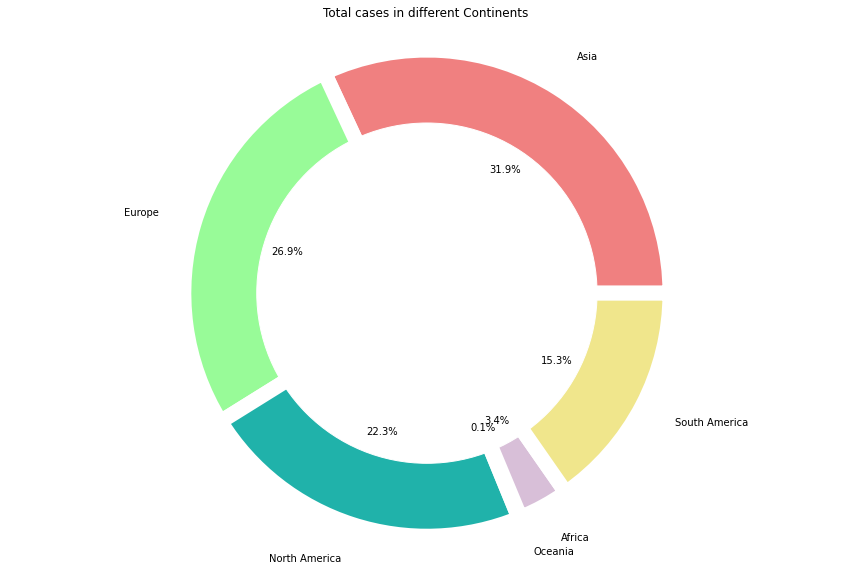

In [61]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(20, 10))

# create random data
names='Asia', 'Europe', 'North America', 'Oceania', 'Africa', 'South America',
values=[(Asia_c/world_c)* 100, (eur_c/world_c)*100, (NA_c/world_c)*100, (Ocean_c/world_c)*100, (Africa_c/world_c)*100, (SA_c/world_c)*100]
colors = ['lightcoral', 'palegreen', 'lightseagreen', 'steelblue', 'thistle', 'khaki']

my_circle = plt.Circle( (0,0), 0.7, color='white')
# Create a pieplot
#plt.pie(size_of_groups)

# Label distance: gives the space between labels and the center of the pie
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 15, 'edgecolor' : 'white' }, colors=colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
ax1.axis('equal')
plt.title("Total cases in different Continents")
plt.show()

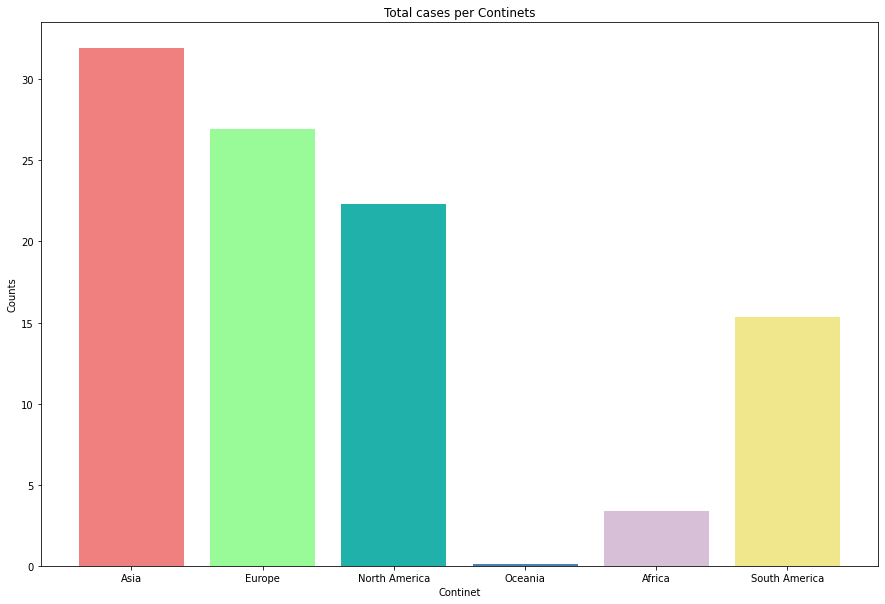

In [62]:
plt.figure(figsize=(15, 10))

# names='Asia', 'Europe', 'North America', 'Oceania', 'Africa', 'South America',
# values=[(Asia_c/world_c)* 100, (eur_c/world_c)*100, (NA_c/world_c)*100, (Ocean_c/world_c)*100, (Africa_c/world_c)*100, (SA_c/world_c)*100]
colors = ['lightcoral', 'palegreen', 'lightseagreen', 'steelblue', 'thistle', 'khaki']
 
# create dataset
height = values
bars = ('Asia', 'Europe', 'North America', 'Oceania', 'Africa', 'South America')
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height,color=colors)
 
# Add title and axis names
plt.title('Total cases per Continets')
plt.xlabel('Continet')
plt.ylabel('Counts')
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()

In [64]:
world_d = World.iloc[-1].total_deaths
world_d

5079990.0

In [65]:
Asia_d = Asia.iloc[-1].total_deaths
eur_d = EUR.iloc[-1].total_deaths
NA_d = NA.iloc[-1].total_deaths
Ocean_d = Ocean.iloc[-1].total_deaths
Africa_d = Africa.iloc[-1].total_deaths
SA_d = SA.iloc[-1].total_deaths

In [139]:
print(Asia_d)
print(eur_d)
print(NA_d)
print(Ocean_d)
print(Africa_d)
print(SA_d)

1191830.0
1347494.0
1143392.0
3001.0
220240.0
1174018.0


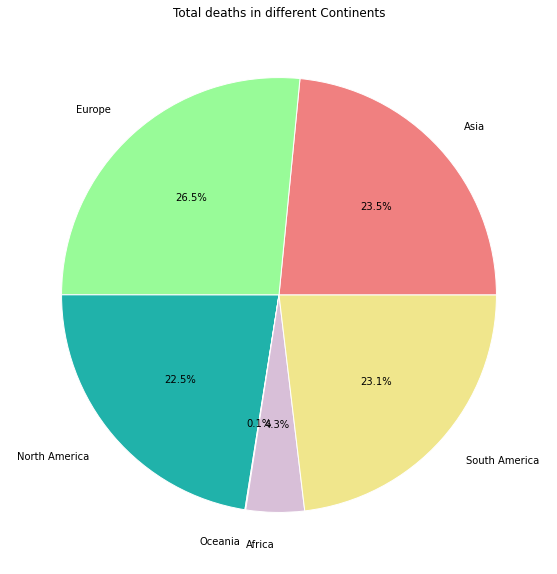

In [66]:
plt.figure(figsize=(15, 10))

names='Asia', 'Europe', 'North America', 'Oceania', 'Africa', 'South America',
values=[(Asia_d/world_d)* 100, (eur_d/world_d)*100, (NA_d/world_d)*100, (Ocean_d/world_d)*100, (Africa_d/world_d)*100, (SA_d/world_d)*100]
colors = ['lightcoral', 'palegreen', 'lightseagreen', 'steelblue', 'thistle', 'khaki']

plt.title("Total deaths in different Continents")
plt.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors);
plt.show();

In [67]:
list(data.year.unique())*3

['2020', '2021', '2020', '2021', '2020', '2021']

In [68]:
list1 = [Asia.year == "2020", EUR.year == "2020", NA.year == "2020", Ocean.year == "2020", SA.year == "2020", Africa.year == "2020"]
list2 = [Asia.year == "2021", EUR.year == "2021", NA.year == "2021", Ocean.year == "2021", SA.year == "2021", Africa.year == "2021"]

In [69]:
[Asia[list1[0]].iloc[-1].total_deaths,Asia[list2[0]].iloc[-1].total_deaths]

[337854.0, 1191830.0]

In [70]:
mask1 = Asia.year == "2021"
Asia[mask1].iloc[-1].total_deaths

1191830.0

In [71]:
my_count=['Asia', 'Europe', 'North America', 'Oceania', 'Africa', 'South America']
df = pd.DataFrame({
"continent":np.repeat(my_count, 2),
"years":(data.year.unique().tolist())*6,

"value":[Asia[list1[0]].iloc[-1].total_deaths, Asia[list2[0]].iloc[-1].total_deaths, EUR[list1[1]].iloc[-1].total_deaths, EUR[list2[1]].iloc[-1].total_deaths,
         NA[list1[2]].iloc[-1].total_deaths, NA[list2[2]].iloc[-1].total_deaths, Ocean[list1[3]].iloc[-1].total_deaths, Ocean[list2[3]].iloc[-1].total_deaths,
         SA[list1[4]].iloc[-1].total_deaths, SA[list2[4]].iloc[-1].total_deaths, Africa[list1[5]].iloc[-1].total_deaths, Africa[list2[5]].iloc[-1].total_deaths]
})

In [72]:
df

,continent,years,value
0,Asia,2020,337854.0
1,Asia,2021,1191830.0
2,Europe,2020,545720.0
3,Europe,2021,1347494.0
4,North America,2020,512625.0
5,North America,2021,1143392.0
6,Oceania,2020,945.0
7,Oceania,2021,3001.0
8,Africa,2020,418041.0
9,Africa,2021,1174018.0


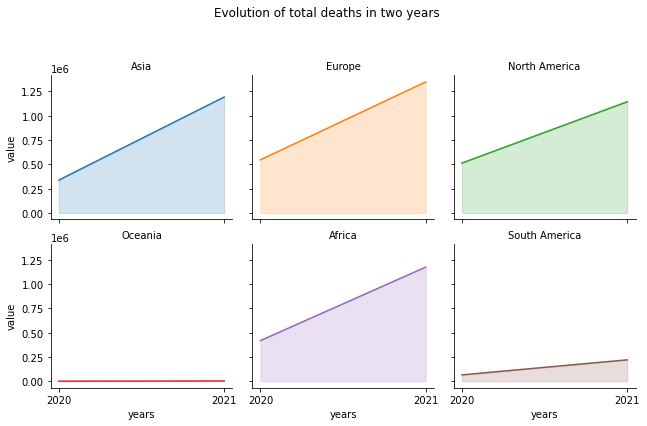

<Figure size 1080x720 with 0 Axes>

In [81]:
# Create a grid : initialize it
g = sns.FacetGrid(df, col='continent', hue='continent', col_wrap=3, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'years', 'value')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'years', 'value', alpha=0.2).set_titles("{col_name} continent")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.82)
g = g.fig.suptitle('Evolution of total deaths in two years')

plt.figure(figsize=(15, 10))

# Show the graph
plt.show()

In [74]:
data.new_cases_smoothed_per_million

index
0         0.000
1         0.000
2         0.000
3         0.000
4         0.000
          ...  
109775    2.679
109776    2.196
109777    1.761
109778    2.291
109779    1.988
Name: new_cases_smoothed_per_million, Length: 109780, dtype: float64

In [75]:
df1 = pd.concat([Asia, EUR, SA, NA, Ocean, Africa])

In [76]:
df1["date"] = pd.to_datetime(df1["date"])

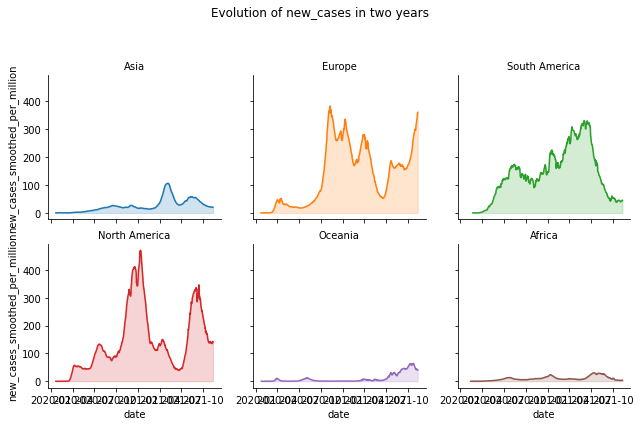

<Figure size 1080x720 with 0 Axes>

In [82]:
# Create a grid : initialize it
g = sns.FacetGrid(df1, col='continent', hue='continent', col_wrap=3, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'date', 'new_cases_smoothed_per_million')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'date', 'new_cases_smoothed_per_million', alpha=0.2).set_titles("{col_name} continent")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.82)
g = g.fig.suptitle('Evolution of new_cases in two years')

plt.figure(figsize=(15, 10))

# Show the graph
plt.show()

In [83]:
data["date"] = pd.to_datetime(data["date"])

In [84]:
Asia_con=data[data.continent == "Asia"]

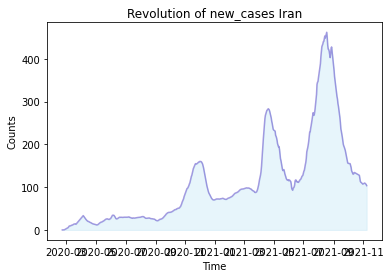

In [86]:
date = Asia_con[Asia_con['location'] == 'Iran']["date"]
value = Asia_con[Asia_con['location'] == 'Iran']["new_cases_smoothed_per_million"]

# Same, but add a stronger line on top (edge)
plt.fill_between( date, value, color="skyblue", alpha=0.2)
plt.plot(date, value, color="Slateblue", alpha=0.6)
# See the line plot function to learn how to customize the plt.plot function
plt.title('Revolution of new_cases Iran')
plt.xlabel('Time')
plt.ylabel('Counts')
# Show the graph
plt.show()

# **Locations in a Specific Continent**

In [87]:
mask = data.continent == "Asia"
data[mask]

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,index,year
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,1.0,0.0,0.000,0.126,0.126,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490000,0.980000,1.470000,1.960000,2.450000,2.940000,3.430000,3.920000,4.410000,4.900000,5.390000,5.880000,6.370000,6.860000,7.350000,7.840000,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,0,2020
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490000,0.980000,1.470000,1.960000,2.450000,2.940000,3.430000,3.920000,4.410000,4.900000,5.390000,5.880000,6.370000,6.860000,7.350000,7.840000,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,1,2020
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490000,0.980000,1.470000,1.960000,2.450000,2.940000,3.430000,3.920000,4.410000,4.900000,5.390000,5.880000,6.370000,6.860000,7.350000,7.840000,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,2,2020
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490000,0.980000,1.470000,1.960000,2.450000,2.940000,3.430000,3.920000,4.410000,4.900000,5.390000,5.880000,6.370000,6.860000,7.350000,7.840000,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,3,2020
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.490000,0.980000,1.470000,1.960000,2.450000,2.940000,3.430000,3.920000,4.410000,4.900000,5.390000,5.880000,6.370000,6.860000,7.350000,7.840000,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108838,Asia,Yemen,2021-11-07,9870.0,12.0,11.286,1909.0,2.0,2.857,323.706,0.394,0.370,62.609,0.066,0.094,0.83,0.0,0.0,0.0,0.0,1.361765,2.723529,4.085294,5.447059,6.808824,8.170588,9.532353,10.894118,12.255882,13.617647,14.979412,16.341176,17.702941,19.064706,20.426471,21.788235,23.15,30490639.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,108838,2021
108839,Asia,Yemen,2021-11-08,9883.0,13.0,12.000,1909.0,0.0,2.714,324.132,0.426,0.394,62.609,0.000,0.089,0.00,0.0,0.0,0.0,0.0,1.361765,2.723529,4.085294,5.447059,6.808824,8.170588,9.532353,10.894118,12.255882,13.617647,14.979412,16.341176,17.702941,19.064706,20.426471,21.788235,23.15,30490639.0,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,108839,2021
108840,Asia,Yemen,2021-11-09,9891.0,8.0,12.143,1915.0,6.0,3.000,324.395,0.262,0.398,62.806,0.197,0.098,0.00,0.0,0.0,0.0,0.0,1.361765,2.723529,4.085294,5.447059,6.8088

In [88]:
df2 = data[mask][data[mask].location != 'Asia']

In [89]:
df2.location.unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'Hong Kong',
       'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macao',
       'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal',
       'Northern Cyprus', 'Oman', 'Pakistan', 'Palestine', 'Philippines',
       'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka',
       'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor', 'Turkey',
       'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam',
       'Yemen'], dtype=object)

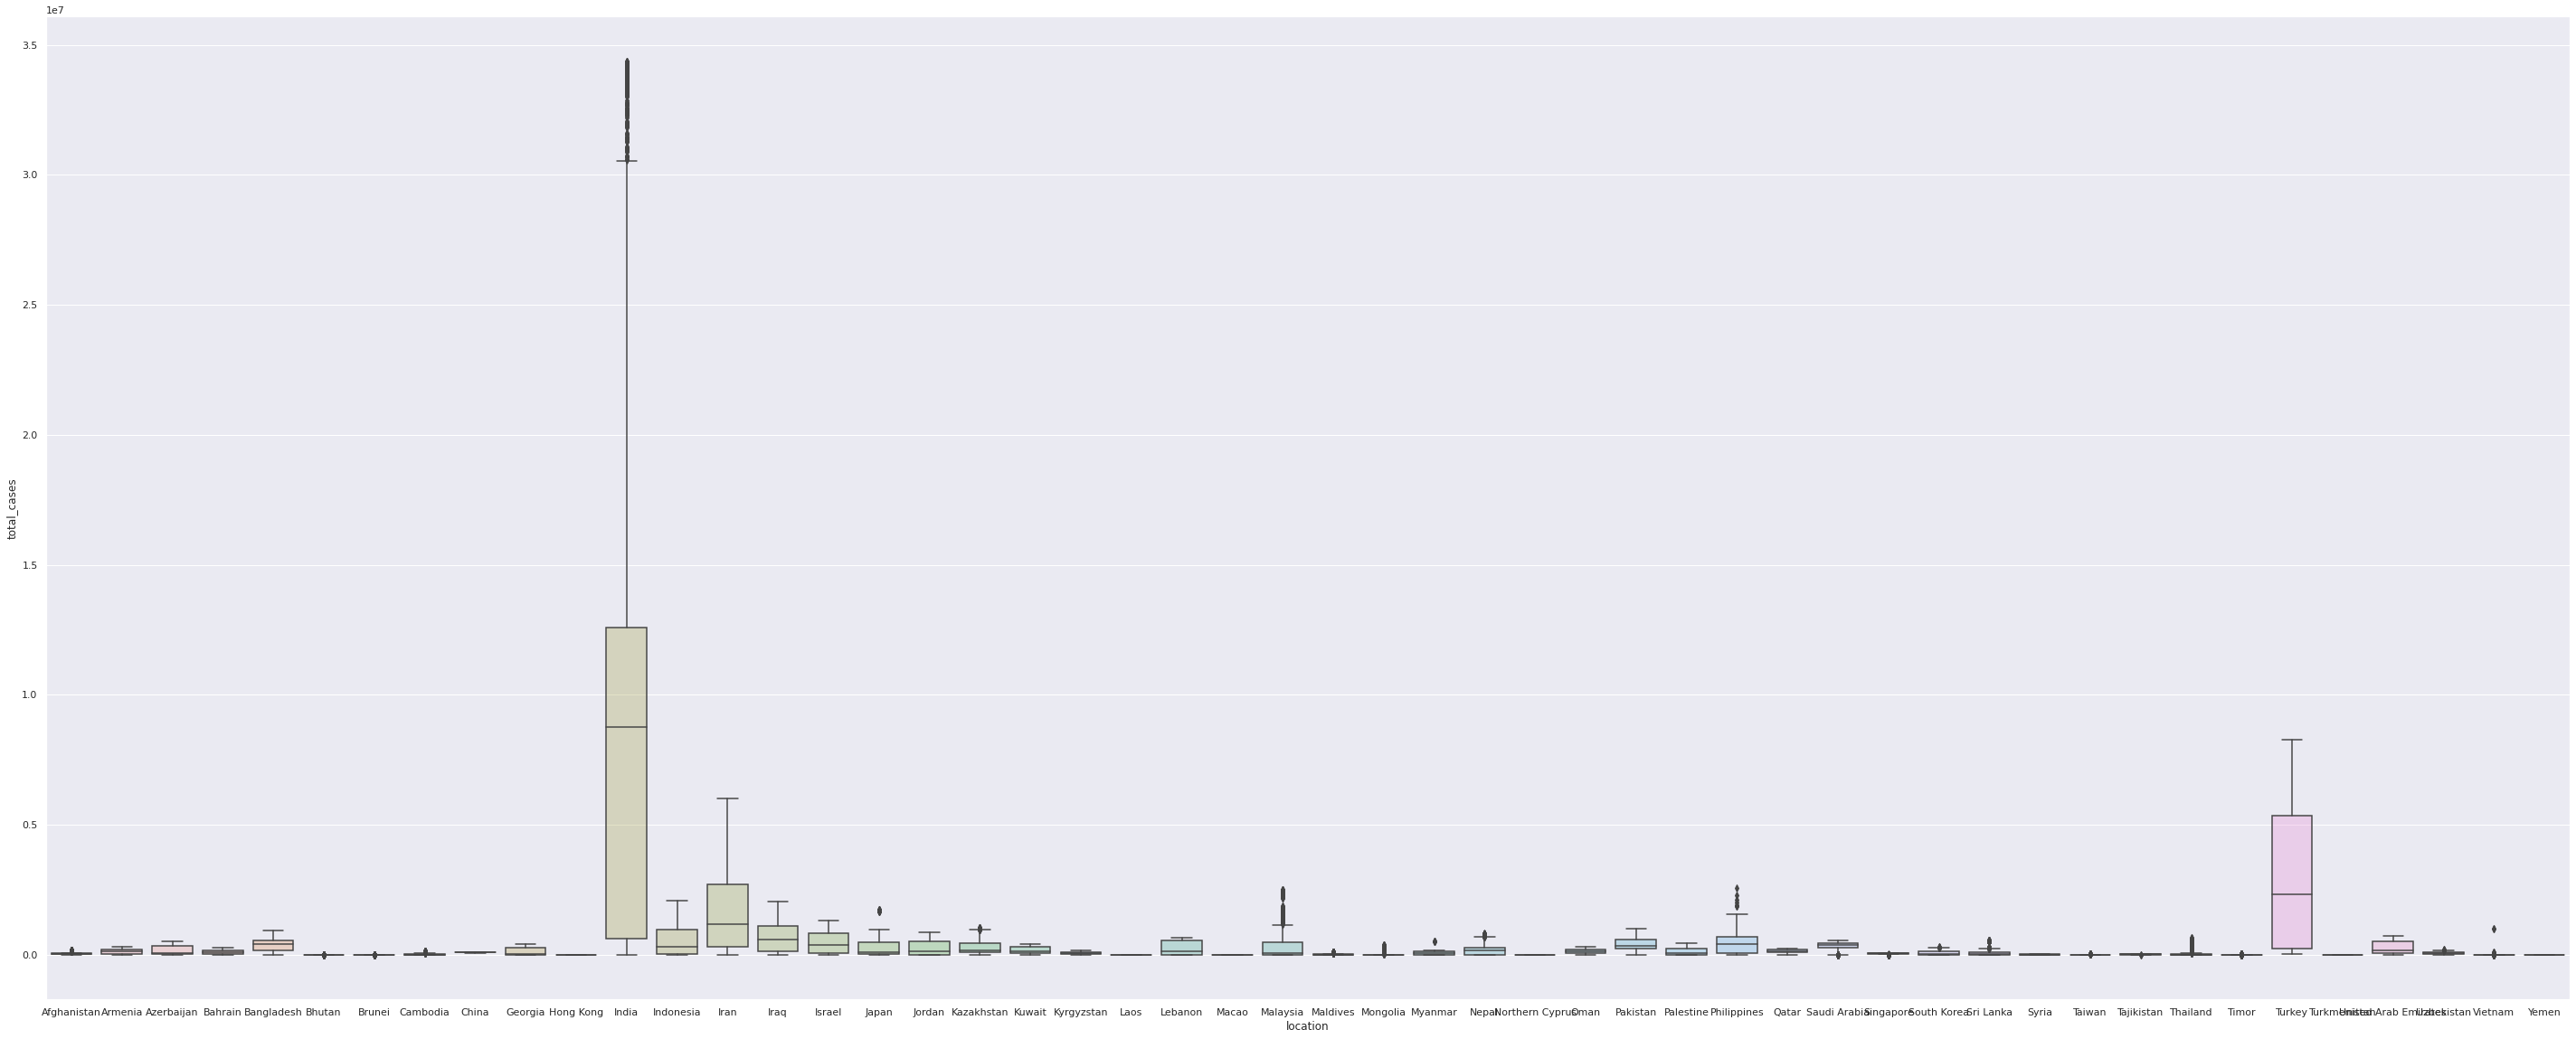

In [90]:
sns.set(style="darkgrid")
plt.figure(figsize=(50, 20))
# usual boxplot, plotted on a matplotlib.axes object named ax
ax = sns.boxplot(x=df2.location, y=df2.total_cases, data=df2)
 
# adding transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))

plt.show()

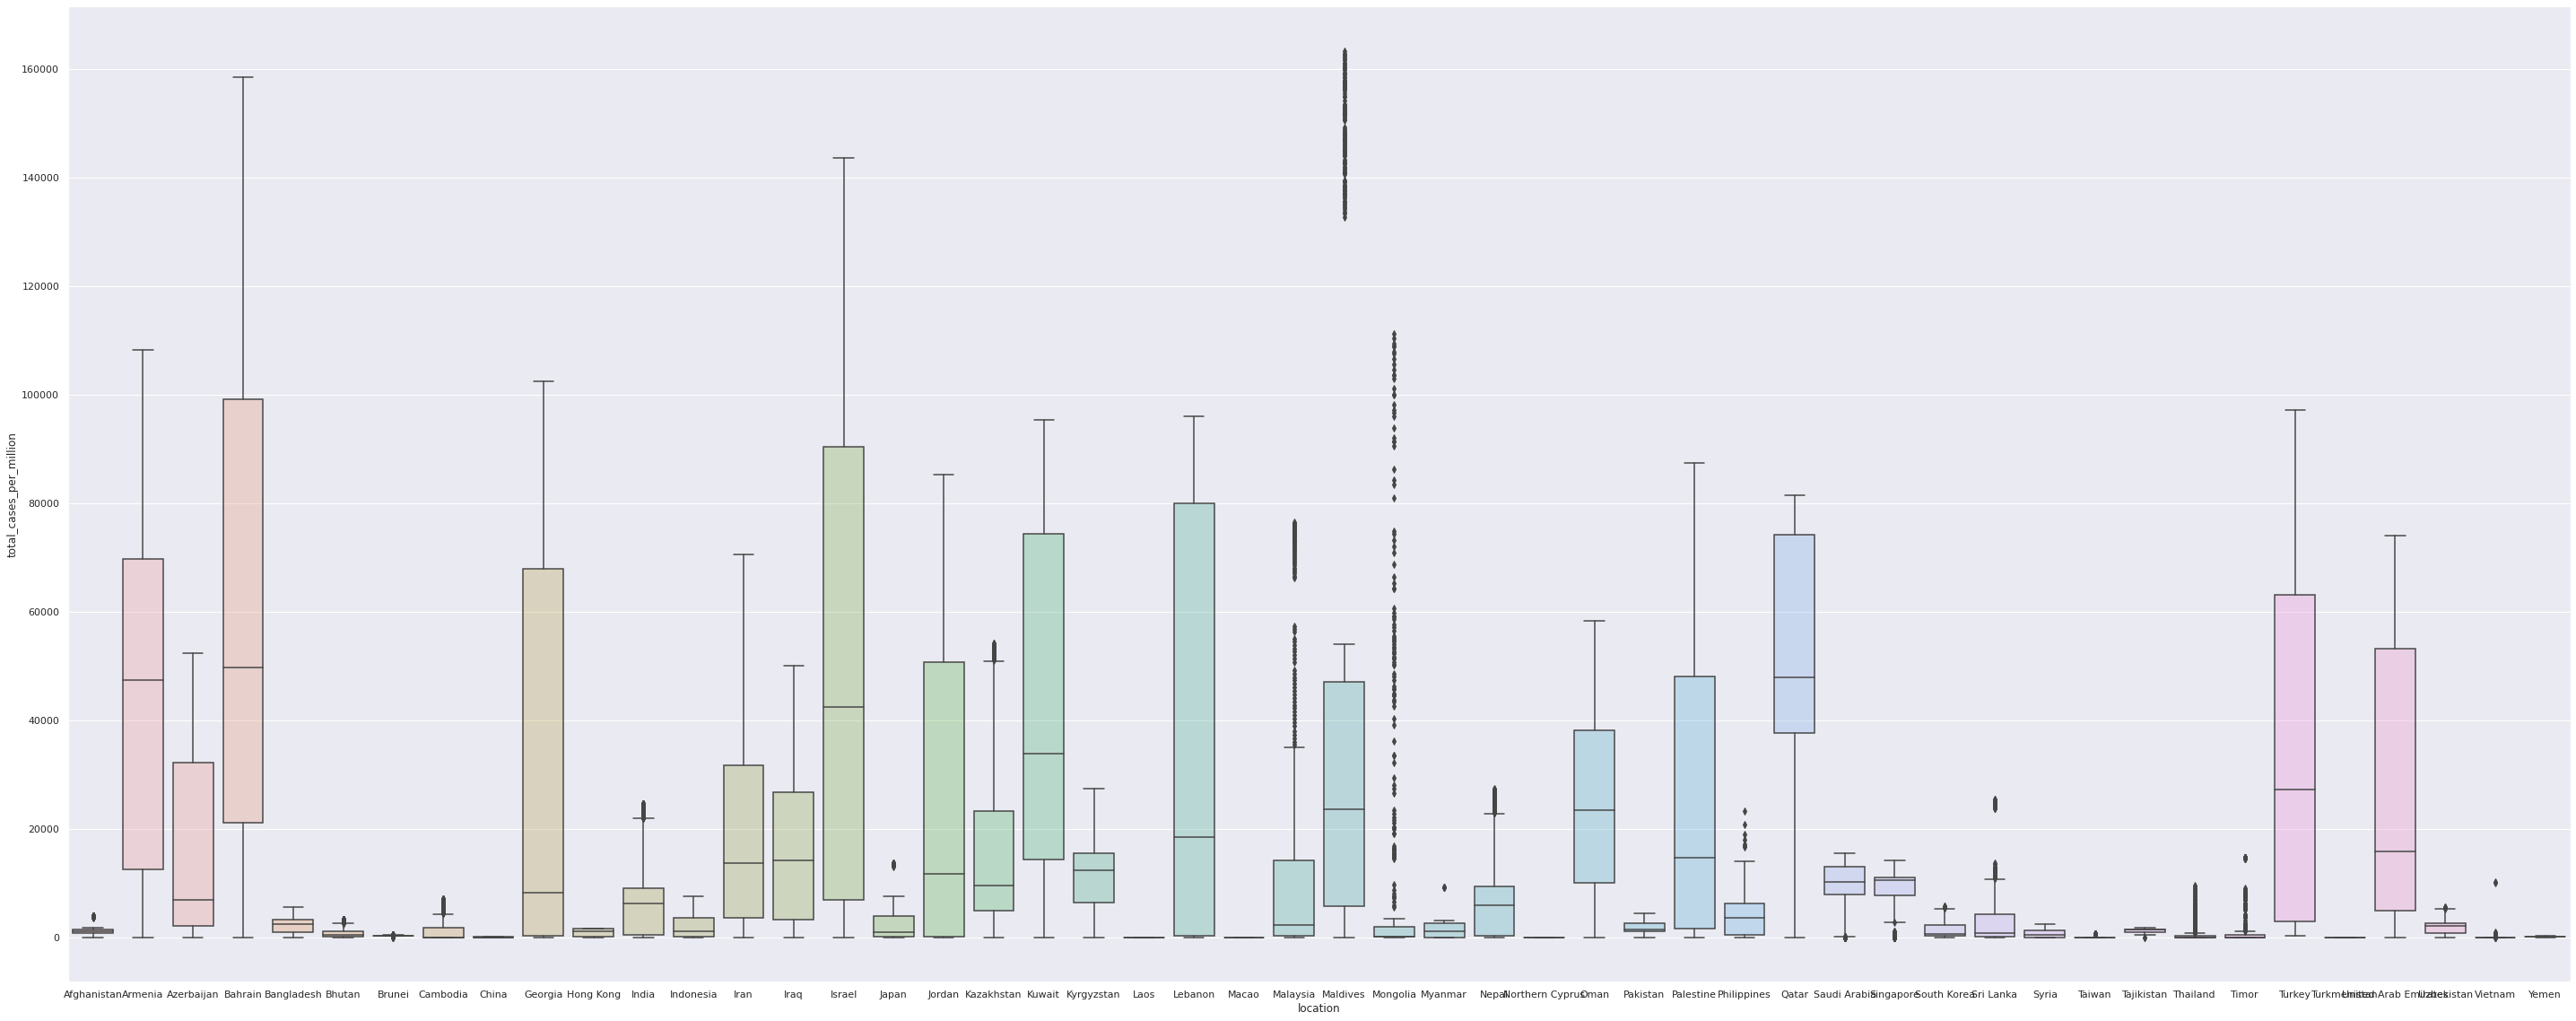

In [91]:
sns.set(style="darkgrid")
plt.figure(figsize=(50, 20))
# usual boxplot, plotted on a matplotlib.axes object named ax
ax = sns.boxplot(x=df2.location, y=df2.total_cases_per_million, data=df2)
 
# adding transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))

plt.show()

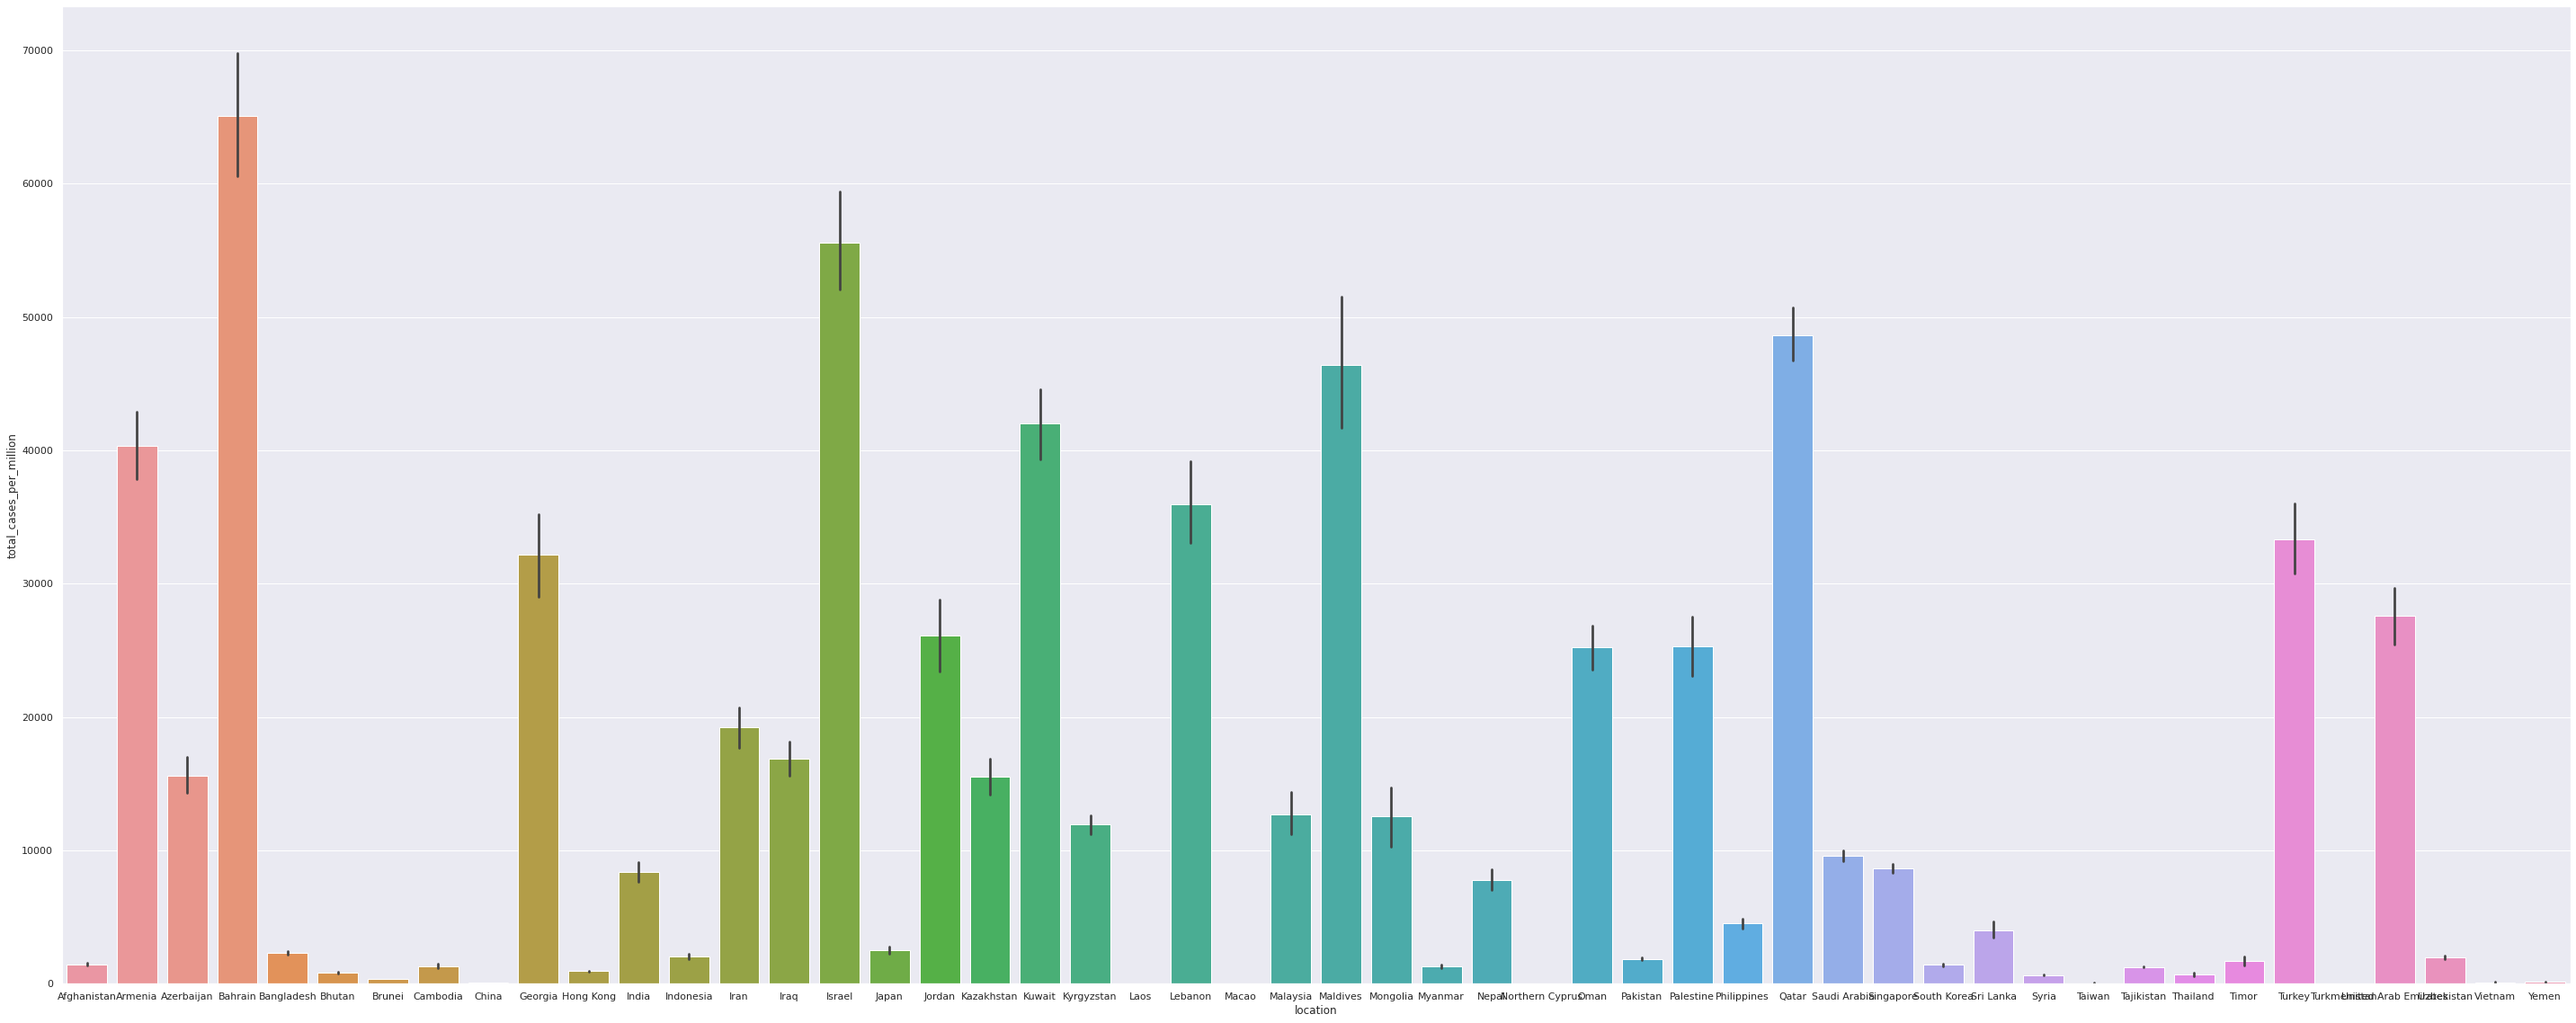

In [92]:
plt.figure(figsize=(50, 20))

ax = sns.barplot(x="location", y="total_cases_per_million", data=df2)

In [93]:
mask1 = data.continent == "Europe"
df3 = data[mask1][data[mask1].location != 'Europe']

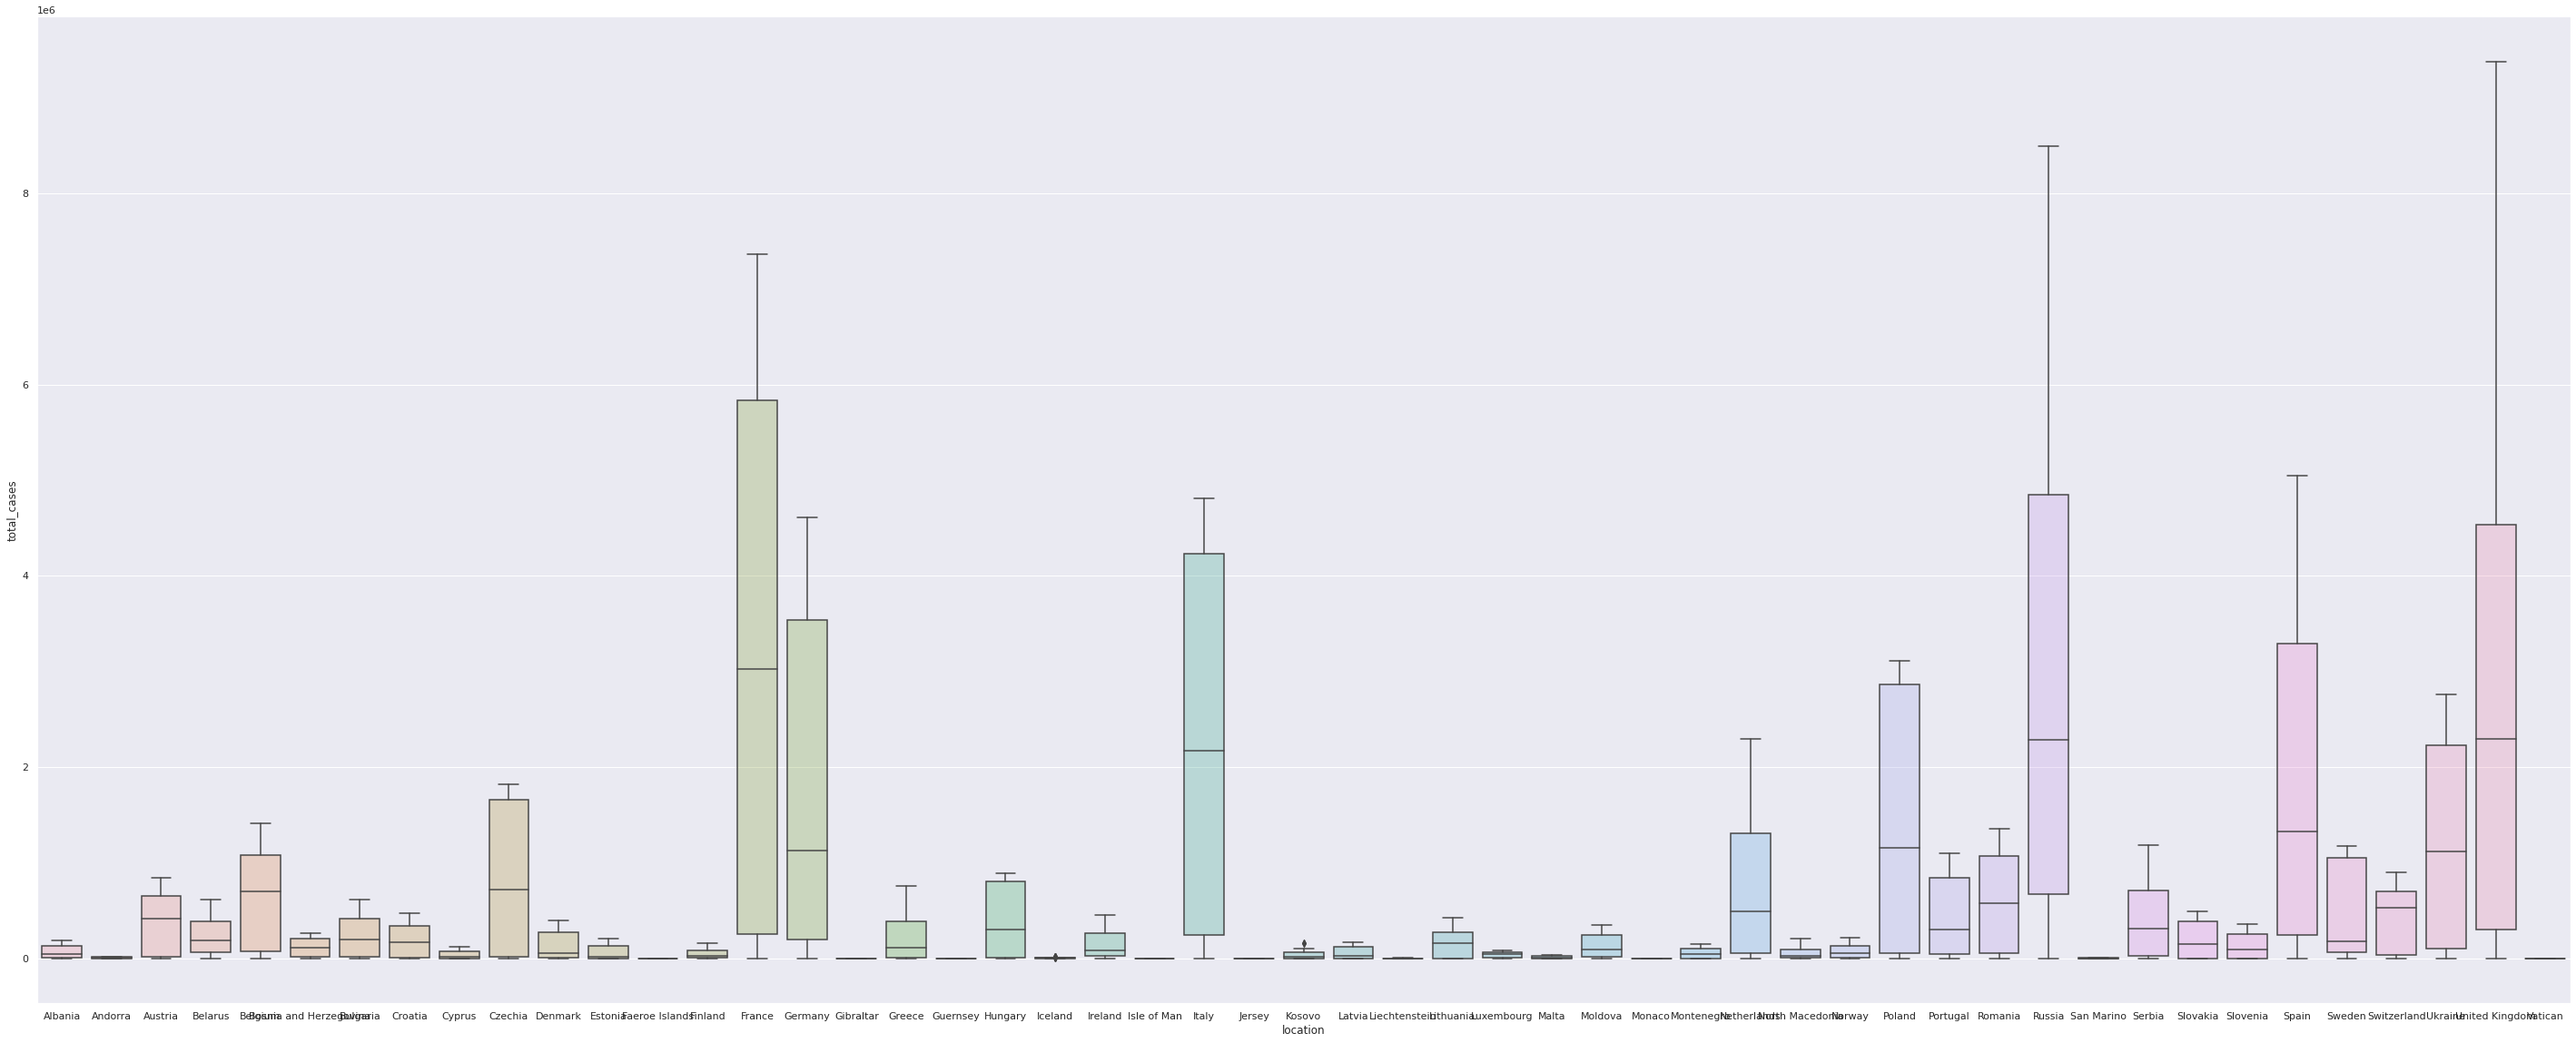

In [100]:
sns.set(style="darkgrid")
plt.figure(figsize=(50, 20))
# usual boxplot, plotted on a matplotlib.axes object named ax
ax = sns.boxplot(x=df3.location, y=df3.total_cases, data=df3)
 
# adding transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))

plt.show()

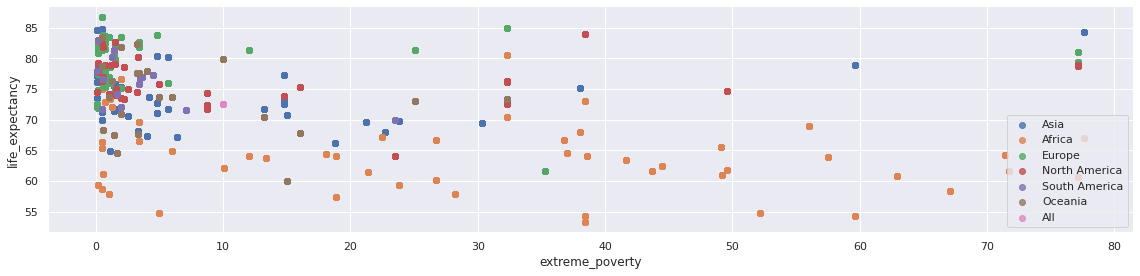

In [96]:
#plt.figure(figsize=(20, 10))

sns.set(rc={'figure.figsize':(20,8)})
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="extreme_poverty", y="life_expectancy", data=data, fit_reg=False, hue='continent', legend=False, height=4, aspect=4)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

In [89]:
# data[mask1]
#  s=data1952['pop']/50000

In [106]:
af = data.continent == "North America"
data[af]
af = data[af][data[af].location != 'North America']

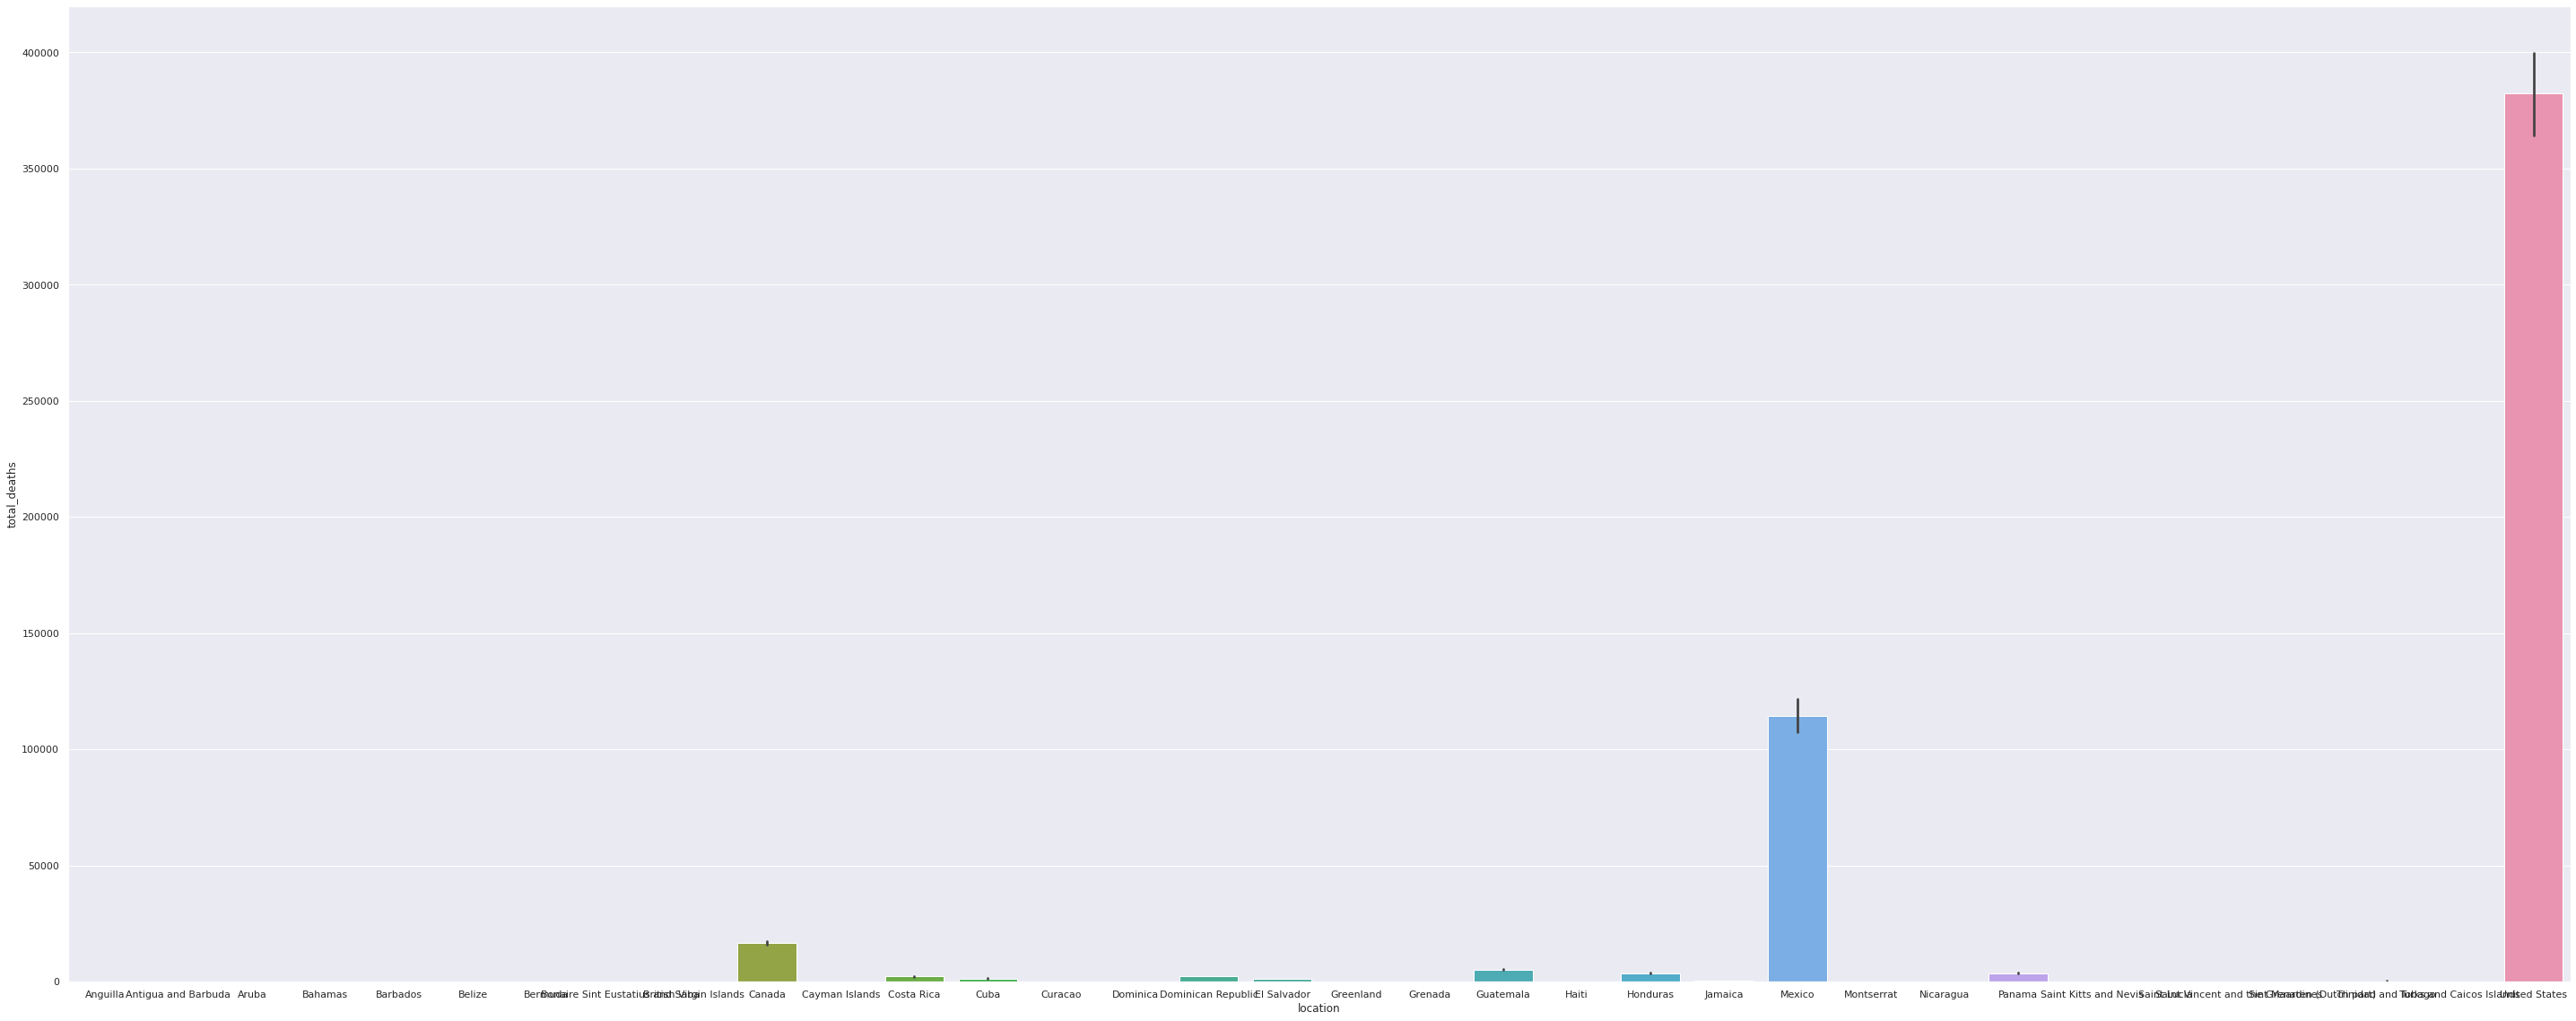

In [109]:
plt.figure(figsize=(50, 20))

ax = sns.barplot(x="location", y="total_deaths", data=af)

In [127]:
sf = data.continent == "South America"
data[sf]
sf = data[sf][data[sf].location != 'South America']

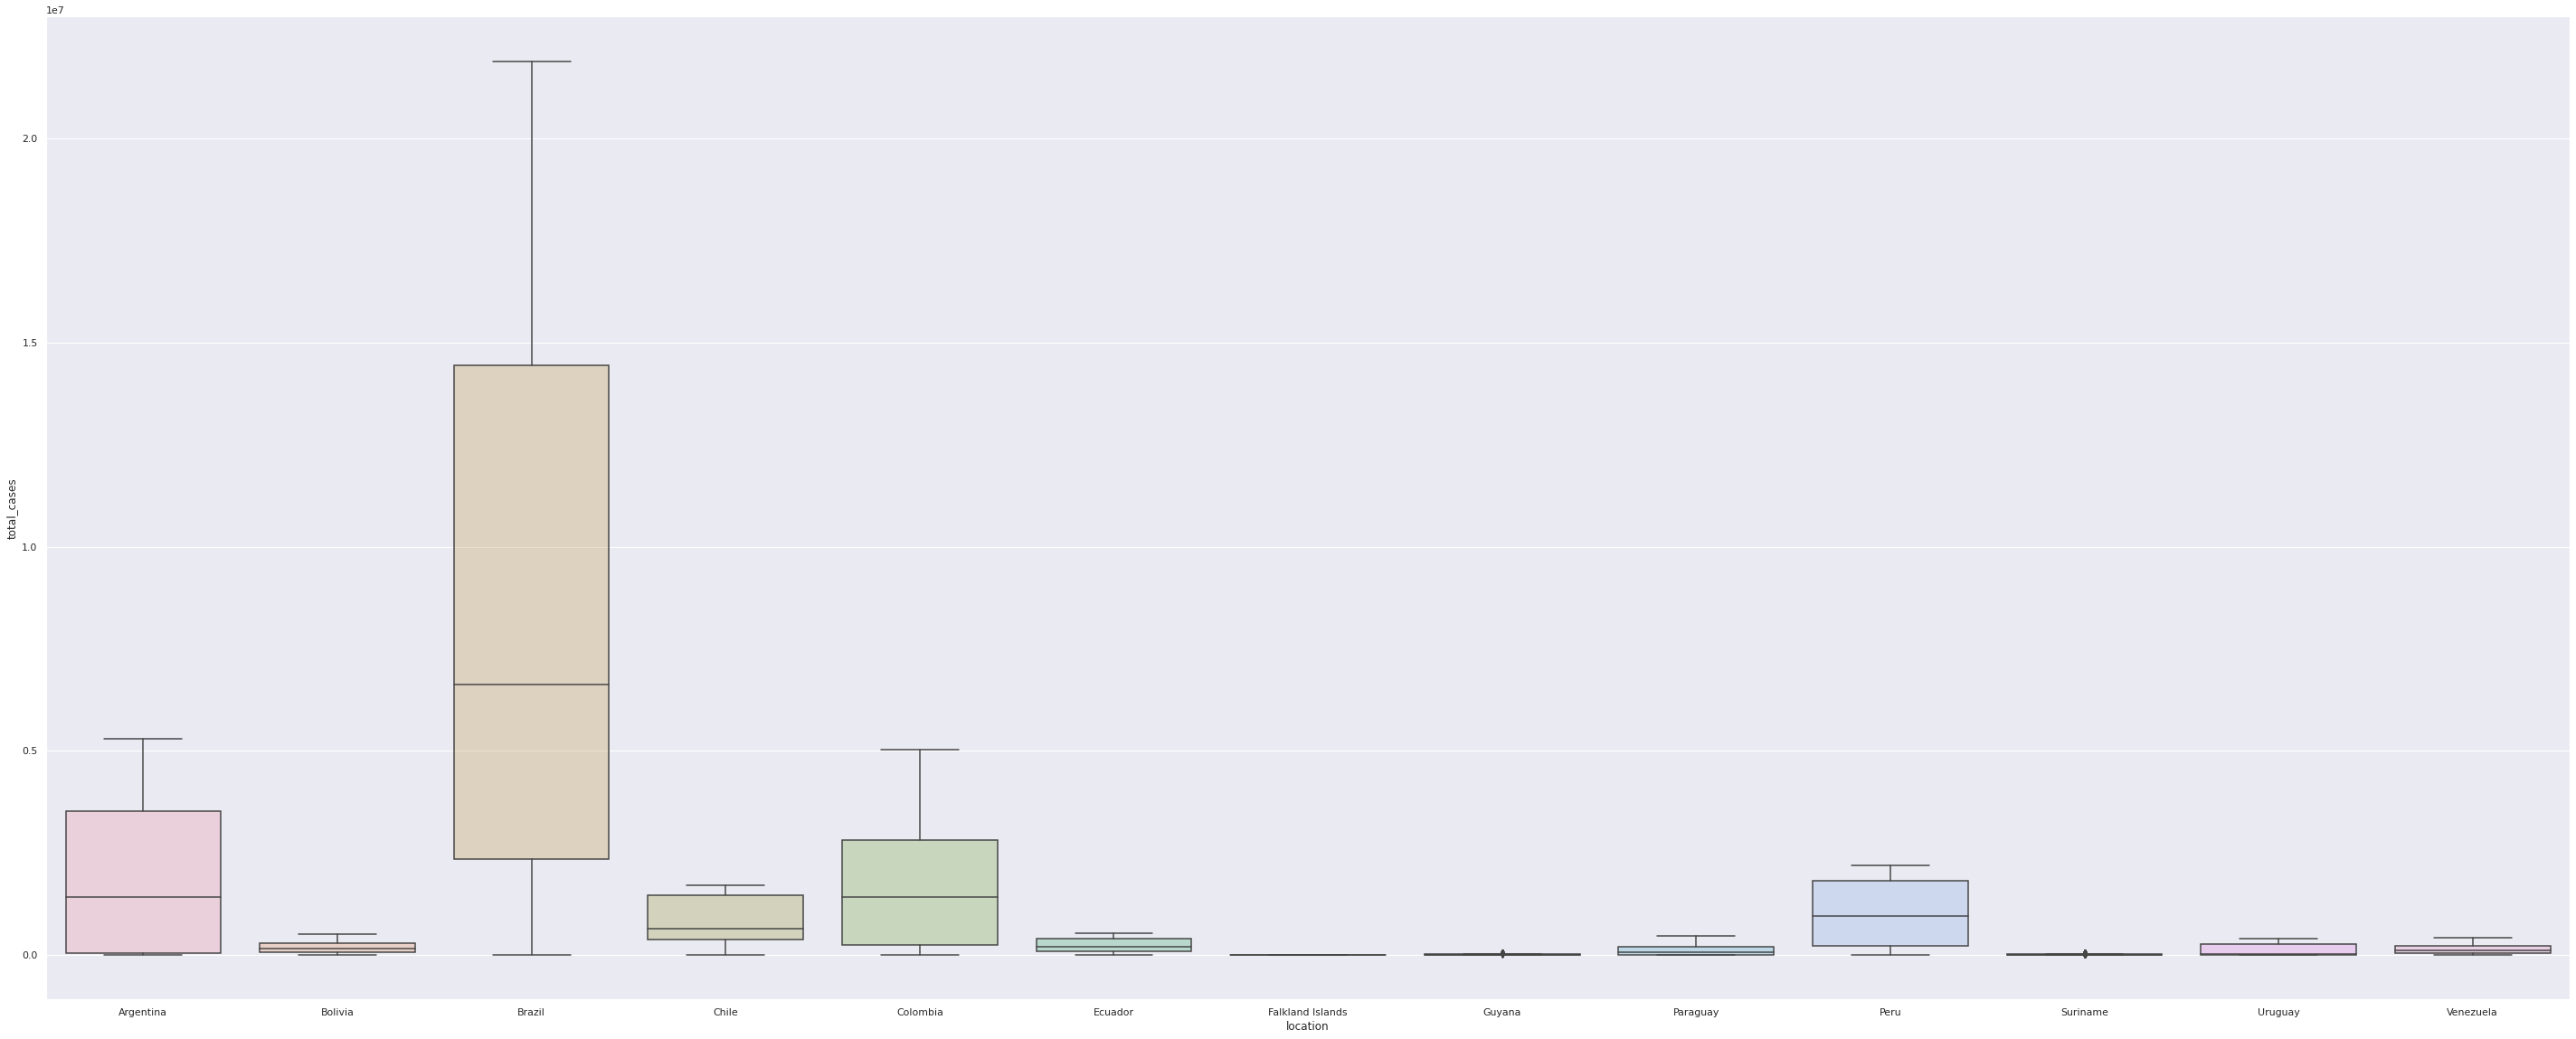

In [132]:
sns.set(style="darkgrid")
plt.figure(figsize=(50, 20))
# usual boxplot, plotted on a matplotlib.axes object named ax
ax = sns.boxplot(x=sf.location, y=sf.total_cases, data=sf)
 
# adding transparency to colors
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))

plt.show()

# **ALL CONTINENTS**

In [110]:
new_df = data[data.continent != 'All']

In [112]:
new_df

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,index,year
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Asia,Afghanistan,2020-02-24,5.0,5.0,0.000,1.0,0.0,0.000,0.126,0.126,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.49,0.98,1.470,1.960,2.45,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,0,2020
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.49,0.98,1.470,1.960,2.45,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,1,2020
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.49,0.98,1.470,1.960,2.45,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,2,2020
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.49,0.98,1.470,1.960,2.45,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,3,2020
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.000,1.0,0.0,0.000,0.126,0.000,0.000,0.025,0.000,0.000,0.00,0.0,0.0,0.0,0.0,0.49,0.98,1.470,1.960,2.45,2.940,3.430,3.92,4.41,4.9,5.39,5.88,6.37,6.86,7.35,7.84,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,1.1,597.029,9.59,7.1,51.2,37.746,0.5,64.83,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109775,Africa,Zimbabwe,2021-11-03,133091.0,44.0,40.429,4684.0,1.0,1.286,8818.546,2.915,2.679,310.360,0.066,0.085,0.73,0.0,0.0,0.0,0.0,2135.00,1383689.00,91.683,0.141,3174.00,0.210,0.013,5959034.00,3340933.00,2618101.0,16772.00,14098.00,39.48,22.14,17.35,934.00,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,109775,2021
109776,Africa,Zimbabwe,2021-11-04,133112.0,21.0,33.143,4685.0,1.0,1.429,8819.937,1.391,2.196,310.426,0.066,0.095,0.73,0.0,0.0,0.0,0.0,3104.00,1386793.00,91.888,0.206,3051.00,0.202,0.011,5975760.00,3350163.00,2625597.0,16726.00,14455.00,39.60,22.20,17.40,958.00,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,109776,2021
109777,Africa,Zimbabwe,2021-11-05,133112.0,0.0,26.571,4685.0,0.0,1.429,8819.937,0.000,1.761,310.426,0.000,0.095,0.73,0.0,0.0,0.0,0.0,3228.00,1390021.00,92.102,0.214,3120.00,0.207,0.009,5990358.00,3356421.00,2633937.0,14598.00,14097.00,39.69,22.24,17.45,934.00,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,109777,2021


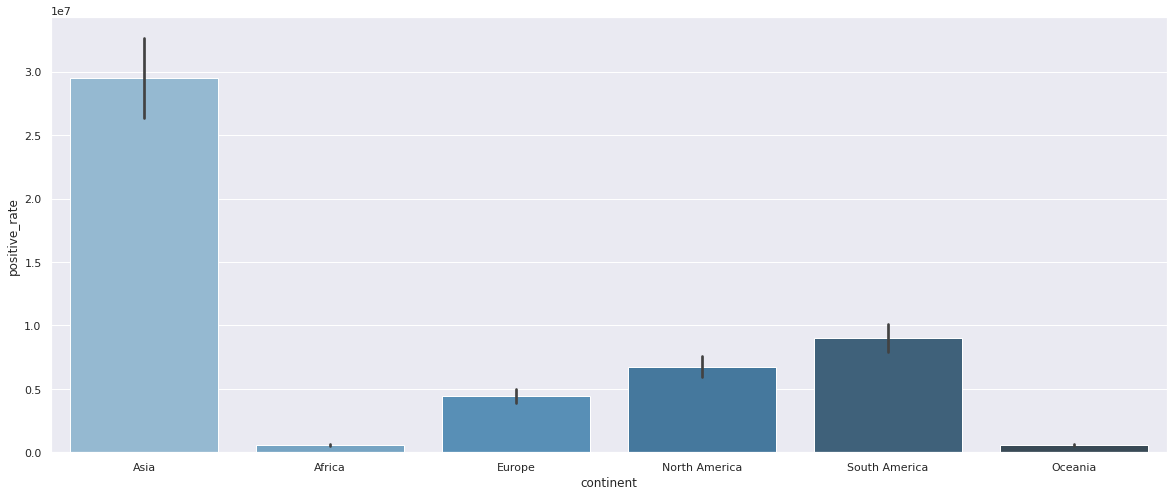

In [113]:
ax = sns.barplot(x="continent", y="positive_rate", data=new_df,
                 palette="Blues_d")

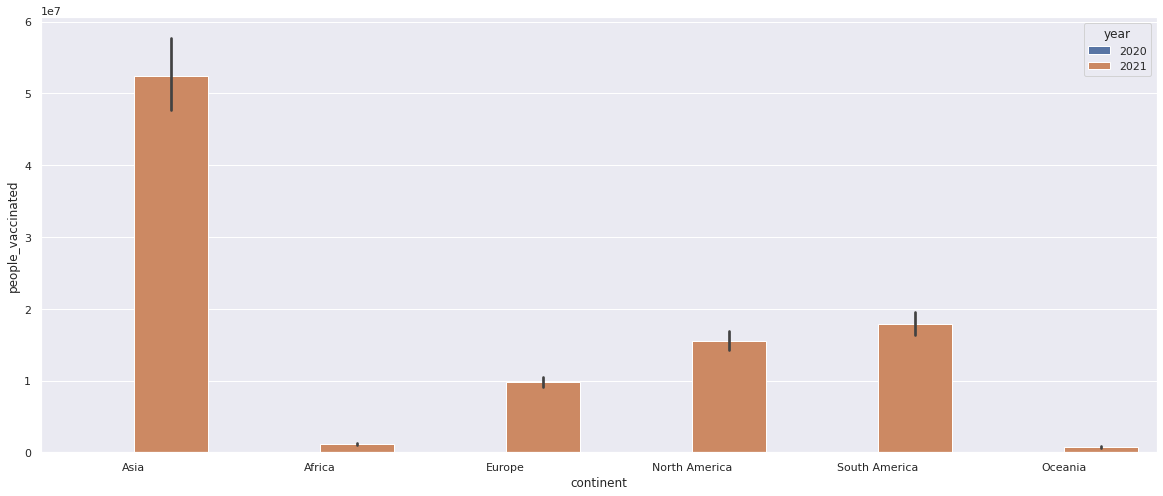

In [114]:
ax = sns.barplot(x="continent", y="people_vaccinated", hue="year", data=new_df)

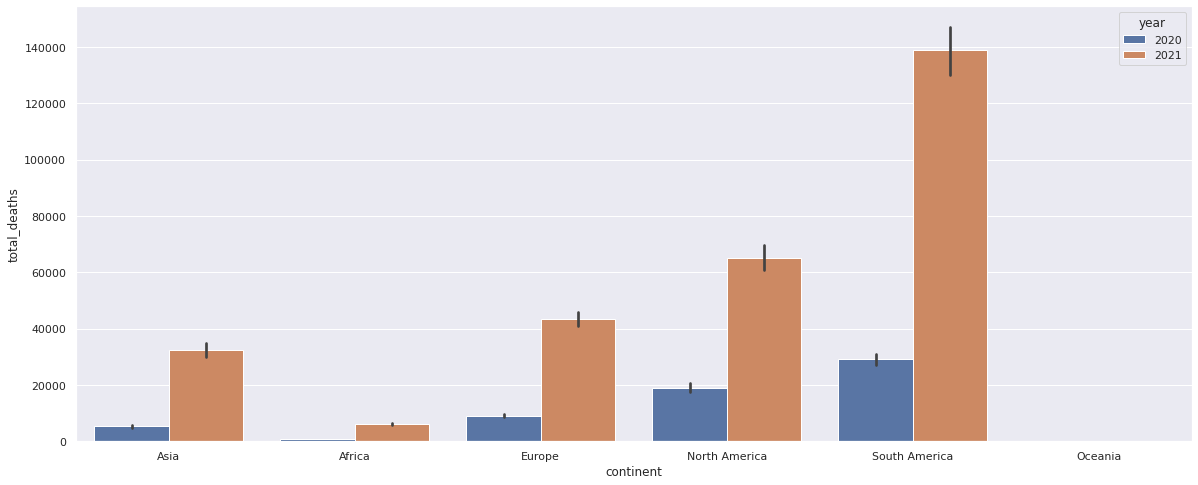

In [115]:
ax = sns.barplot(x="continent", y="total_deaths", hue="year", data=new_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


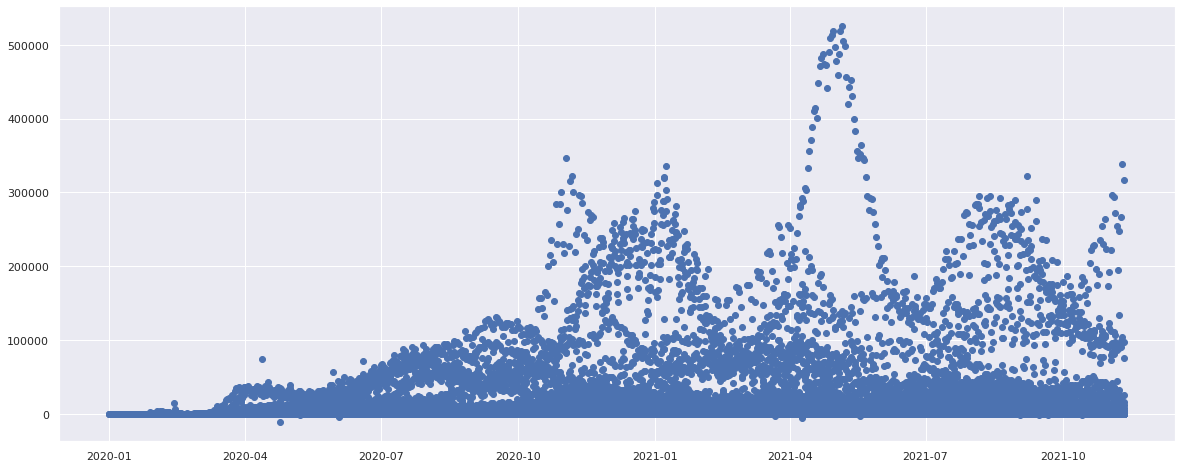

In [133]:
new_df["date"] = pd.to_datetime(new_df["date"])

date = new_df["date"]
value = new_df["new_cases"]

plt.scatter(date, value)
# show the graph
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


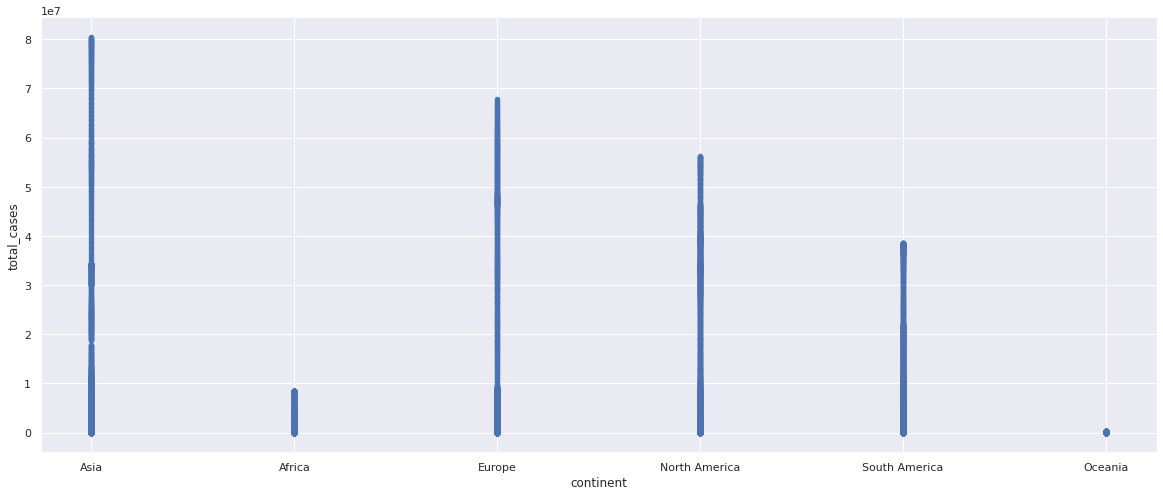

In [117]:
new_df.plot.scatter(x='continent',y='total_cases')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


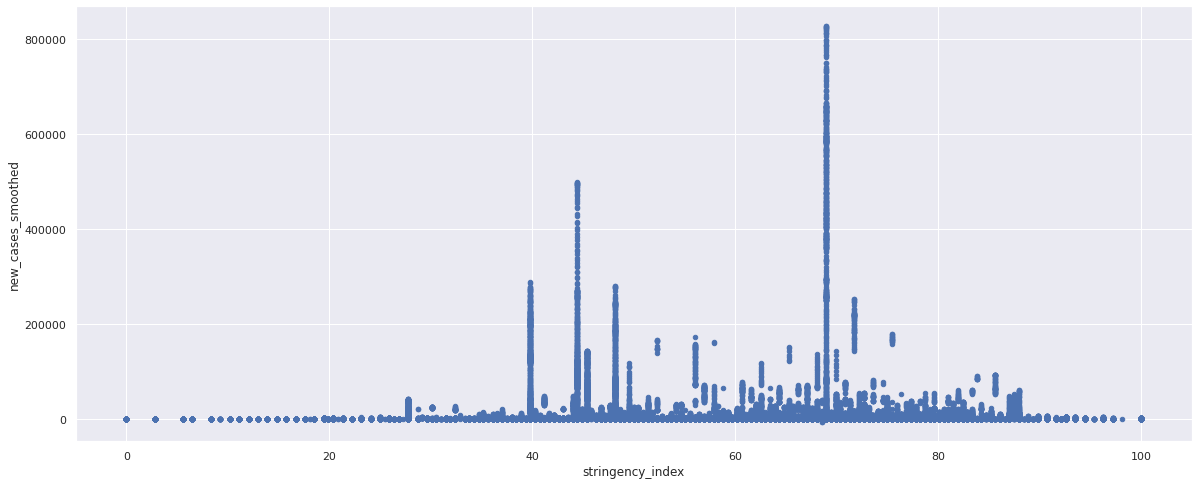

In [122]:
data.plot.scatter(x ='stringency_index', y = 'new_cases_smoothed')

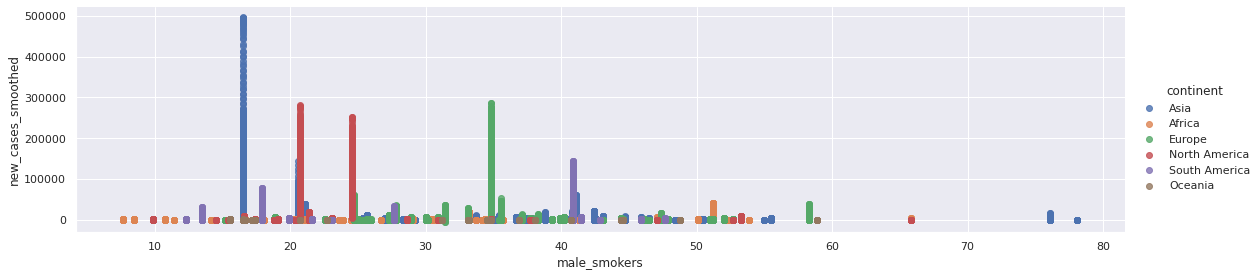

In [123]:
sns.lmplot( x = 'male_smokers', y = 'new_cases_smoothed', data=new_df, fit_reg=False, hue='continent', height=4, aspect=4)
 
plt.show()

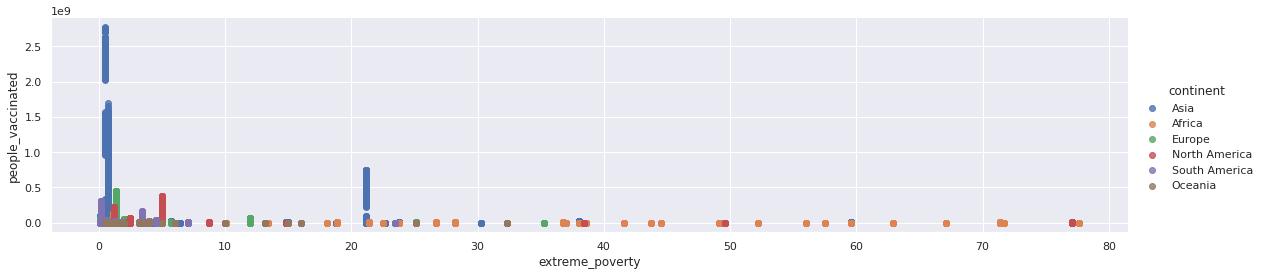

In [124]:
sns.lmplot( x = 'extreme_poverty', y = 'people_vaccinated', data=new_df, fit_reg=False, hue='continent', height=4, aspect=4)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')

plt.show()

<Figure size 2880x1440 with 0 Axes>

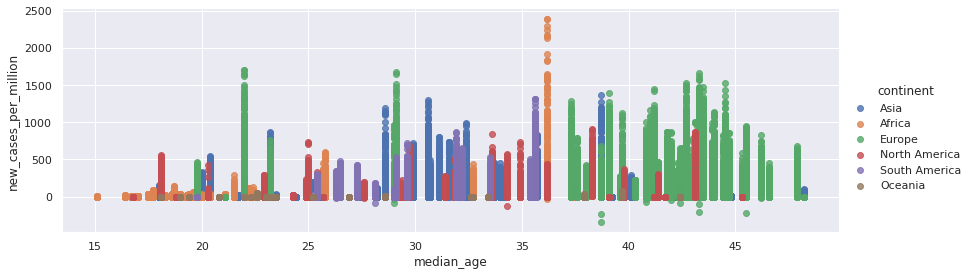

In [140]:
plt.figure(figsize=(40,20))

sns.lmplot( x = 'median_age', y = 'new_cases_per_million', data=new_df, fit_reg=False, hue='continent', height=4, aspect=3)

# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')

plt.show()

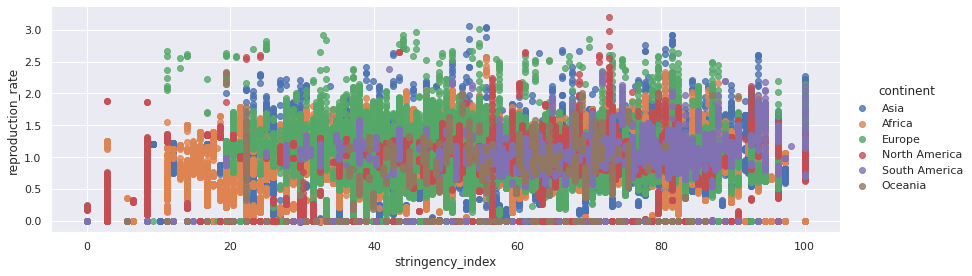

In [147]:
#ax = sns.barplot(x="stringency_index", y="total_deaths", hue="continent", data=new_df)
sns.lmplot( x="stringency_index", y="reproduction_rate", data=new_df, fit_reg=False, hue='continent', height=4, aspect=3)

# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')

plt.show()

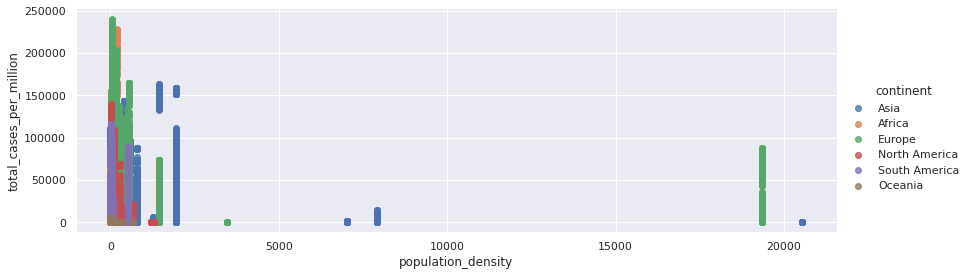

In [167]:
sns.lmplot( x="population_density", y="total_cases_per_million", data=new_df, fit_reg=False, hue='continent', height=4, aspect=3)

plt.show()

# **IRAN**

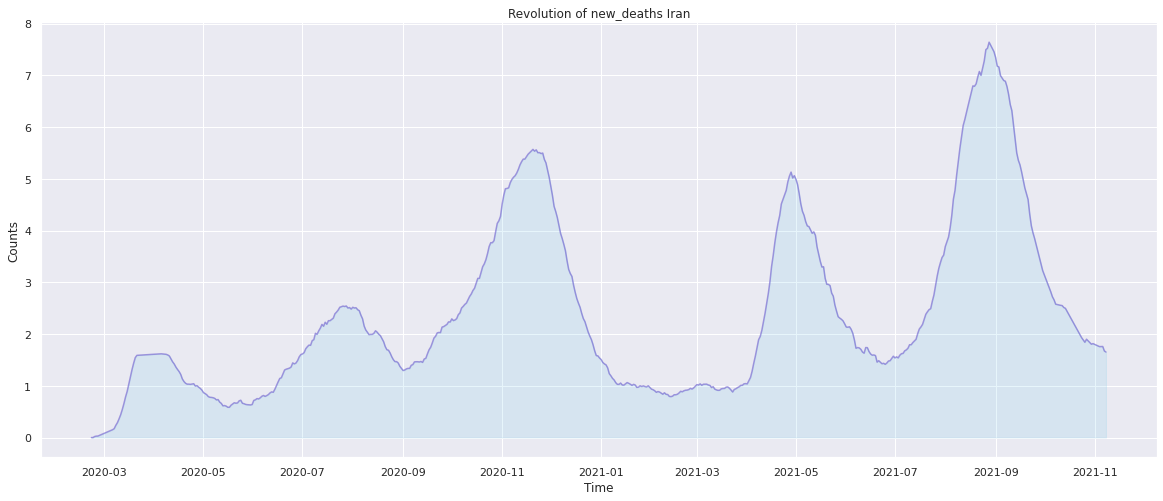

In [164]:
date = Asia_con[Asia_con['location'] == 'Iran']["date"]
value = Asia_con[Asia_con['location'] == 'Iran']["new_deaths_smoothed_per_million"]

# Same, but add a stronger line on top (edge)
plt.fill_between( date, value, color="skyblue", alpha=0.2)
plt.plot(date, value, color="Slateblue", alpha=0.6)
# See the line plot function to learn how to customize the plt.plot function
plt.title('Revolution of new_deaths Iran')
plt.xlabel('Time')
plt.ylabel('Counts')
# Show the graph
plt.show()

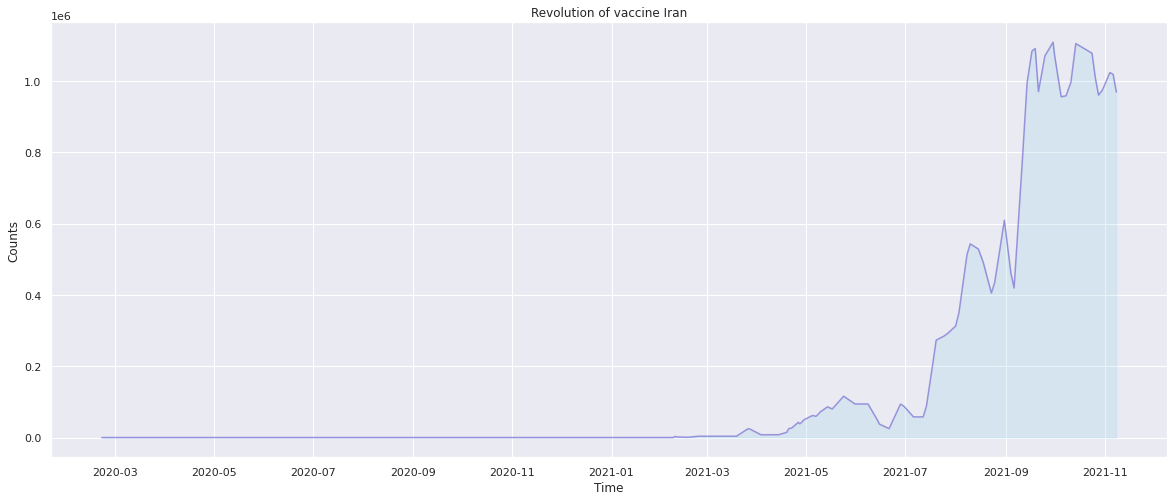

In [158]:
date = Asia_con[Asia_con['location'] == 'Iran']["date"]
value = Asia_con[Asia_con['location'] == 'Iran']["new_vaccinations_smoothed"]

# Same, but add a stronger line on top (edge)
plt.fill_between( date, value, color="skyblue", alpha=0.2)
plt.plot(date, value, color="Slateblue", alpha=0.6)
# See the line plot function to learn how to customize the plt.plot function
plt.title('Revolution of vaccine Iran')
plt.xlabel('Time')
plt.ylabel('Counts')
# Show the graph
plt.show()

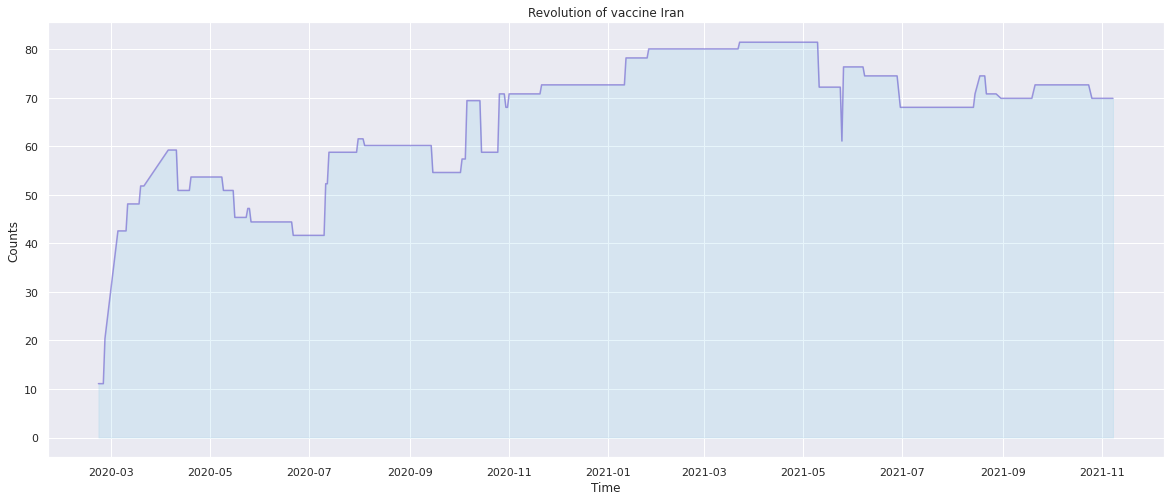

In [162]:
date = Asia_con[Asia_con['location'] == 'Iran']["date"]
value = Asia_con[Asia_con['location'] == 'Iran']["stringency_index"]

# Same, but add a stronger line on top (edge)
plt.fill_between( date, value, color="skyblue", alpha=0.2)
plt.plot(date, value, color="Slateblue", alpha=0.6)
# See the line plot function to learn how to customize the plt.plot function
plt.title('Revolution of vaccine Iran')
plt.xlabel('Time')
plt.ylabel('Counts')
# Show the graph
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


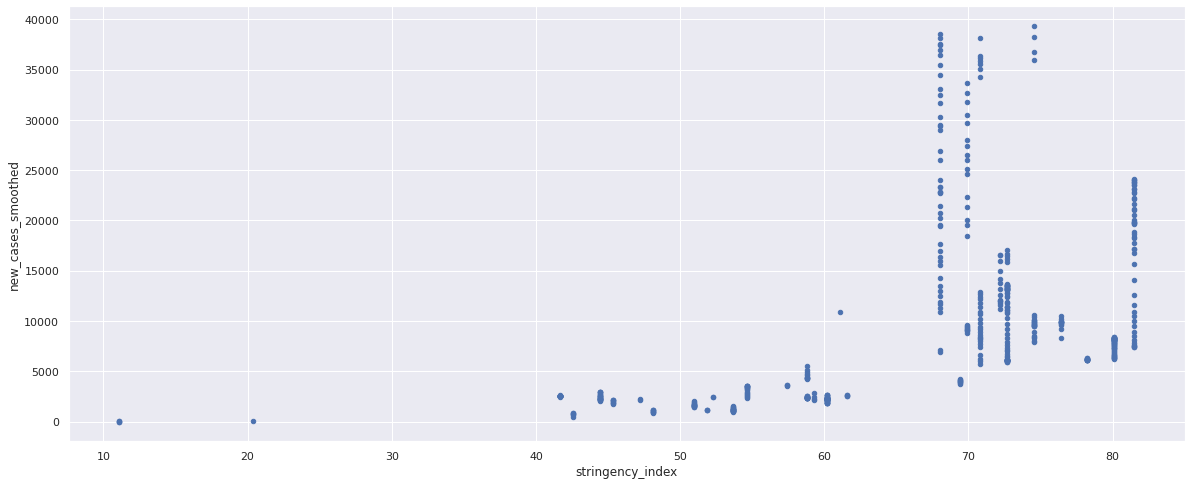

In [161]:
# date = Asia_con[Asia_con['location'] == 'Iran']["stringency_index"]
# value = Asia_con[Asia_con['location'] == 'Iran']["new_deaths_smoothed"]

Asia_con[Asia_con['location'] == 'Iran'].plot.scatter(x ='stringency_index', y = 'new_cases_smoothed')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


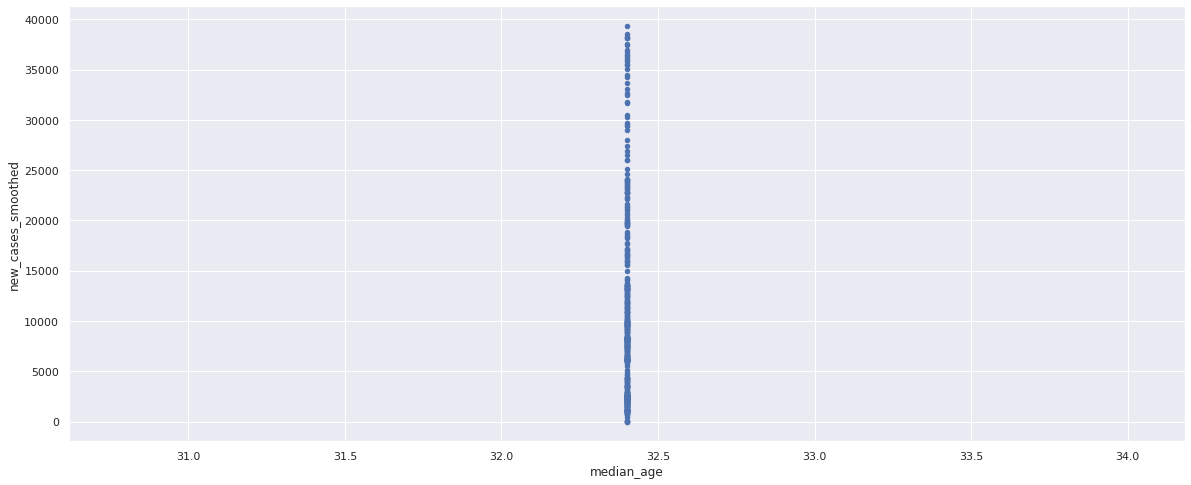

In [166]:
Asia_con[Asia_con['location'] == 'Iran'].plot.scatter(x ='median_age', y = 'new_cases_smoothed')